## **Проектное исследование на основе открытых данных в области биомедицины**

https://minds.wisconsin.edu/bitstream/handle/1793/59692/TR1131.pdf;jsessionid=944B13EC1D0D6DCB528D22A999948C8E?sequence=1
* ссылка на статью
## Извлечение ядерных признаков для диагностики опухоли молочной железы
У. Стрит, У. Вольберг, О. Мангасарян
Опубликовано в журнале «Электронная визуализация» 29 июля 1993 г.

### **Аннотация**
Для создания высокоточной системы диагностики опухолей молочной железы были использованы интерактивные методы обработки изображений, а также индуктивный классификатор на основе линейного программирования. Небольшая часть препарата, полученного с помощью тонкоигольной аспирационной биопсии, отбирается и оцифровывается. Это позволяет проводить точный автоматизированный анализ размера, формы и текстуры ядер. Для каждого ядра вычисляются десять таких характеристик, и для диапазона изолированных клеток определяются среднее значение, наибольшее (или «наихудшее») значение и стандартная ошибка каждой характеристики. После анализа таким образом 569 изображений были протестированы различные комбинации характеристик, чтобы найти те, которые лучше всего отделяют доброкачественные образцы от злокачественных. Десятикратная точность перекрестной проверки в 97% была достигнута с использованием одной разделительной плоскости по трем из тридцати признаков: средней текстуре, наихудшей площади и наихудшей гладкости. Это представляет собой улучшение по сравнению с лучшими результатами диагностики в медицинской литературе. В настоящее время система используется в больницах Университета Висконсина. Тот же набор признаков также использовался в гораздо более сложной задаче прогнозирования отдаленного рецидива злокачественной опухоли у пациентов, что привело к точности 86%.


## **Цель:**
Применить методы как классического, так и глубокого машинного обучения для достижения наилучших результатов в предсказании медицинских исходов на основе выбранного набора данных.

Для работы был использован датасет **Breast Cancer Wisconsin Dataset**, ссылка на репозиторий: (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))


### **Описание датасета: данные и признаки**

Датасет включает реальные данные пациенток, которым была проведена тонкоигольная аспирационная биопсия молочной железы для диагностики характера опухолевого образования.

Все признаки были получены в результате компьютерной обработки изображений биопсийного материала с использованием специализированного программного обеспечения. При этом анализировались только клеточные ядра, поэтому все **признаки представлены вычисленными программой специфическими характеристиками клеточных ядер**. (Nuclear feature extraction for breast tumor diagnosis By W. Street, W. Wolberg, O. Mangasarian. 1993 Published in Electronic imaging) (https://www.sci-hub.ru/10.1117/12.148698)

Ключевым этапом подготовки изображений для компьютерной обработки стало выделение границ клеточных ядер - прорисовку их контуров. На основе полученных линий контуров выполнялась дальнейшая обработка изображений и извлечение признаков.

Пример изображения - биоптата с выделенными программой границами клетчных ядер для дальнейшей обработки и извлечения признаков (Nuclear feature extraction for breast tumor diagnosis By W. Street, W. Wolberg, O. Mangasarian. 1993 Published in Electronic imaging, figure 2) (https://www.sci-hub.ru/10.1117/12.148698)

![Пример биоптата с выделенными программой ядрами клеток для дальнейшей обработки и извлечения признаков из статьи выше](attachment:image.png)




**Всего вычислялось 10 ключевых признаков:**

   1) *radius* (mean of distances from center to points on the perimeter)- среднее расстояние от центра ядра до его границы
   2) *texture* (standard deviation of gray-scale values) - определения разницы в интенсивности оттенков серого
   3) *perimeter* (длина "окружности" клеточного ядра)
   4) *area* (Площадь ядра измеряется простым подсчетом количества пикселей внутри выделенной границы и добавлением половины пикселей от периметра)
   5) *smoothness* (local variation in radius lengths) - локальные вариации длины радиуса клеточного ядра
   6) *compactness* (perimeter**2 / area - 1.0) - компактность (периметр^2 / площадь - 1,0)
   7) *concavity* (severity of concave portions of the contour) - степень вогнутости контура (линни границы) клеточного ядра
   8) *concave_points* (number of concave portions of the contour) - количество "вогнутостей"
   9) *symmetry* - симметрия клеточного ядер: находится самая длинная ось ядра, проходящая через центр, к ней проводят перпендикуляры и оценивают длину каждого из отрезков по обе стороны от оси.
   10) *fractal_dimension* ("coastline approximation" - 1) - фрактальная размерность («приближение береговой линии» - 1)

Все признаки численно моделировались таким образом, что бОльшие значения обычно указывают на более высокую вероятность злокачественности.

Для каждого признака вычислялось среднее значение, экстремальное (наибольшее) значение и стандартная ошибка, поэтому в финальном датасете для каждого изображения получалось 30 признаков.

Распределение по классам: 357 доброкачественных, 212 злокачественных

In [610]:
from warnings import filterwarnings
filterwarnings('ignore')

import pandas as pd                    # Импорт библиотеки pandas для работы с табличными данными (DataFrame)
import numpy as np                     # Импорт библиотеки numpy для работы с массивами и числовыми операциями
import seaborn as sns                  # Импорт библиотеки seaborn для создания красивых и информативных визуализаций данных
from matplotlib import pyplot as plt   # Импорт функции pyplot из библиотеки matplotlib для создания графиков и визуализаций

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA

from warnings import filterwarnings # Импорт функции для управления предупреждениями
filterwarnings('ignore')             # Игнорирование предупреждений


## **Константы**

In [611]:
# Путь на github
URL = "https://raw.githubusercontent.com/VinogradovAI/breast_cancer_prediction/refs/heads/master/data/raw/data.csv"
TARGET_VAR = 'Diagnosis'

# Data path
DATA_PROCEED_PATH = "D:/ml_school/Skillfactory/team_cases/breast_cancer_prediction/data/processed/"

In [612]:
data = pd.read_csv(URL)

## **Общая информация о датасете**

In [613]:
data.shape

(569, 32)

- 569 строк (наблюдений) и 33 столбца (признака)

In [614]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   radius1             569 non-null    float64
 2   texture1            569 non-null    float64
 3   perimeter1          569 non-null    float64
 4   area1               569 non-null    float64
 5   smoothness1         569 non-null    float64
 6   compactness1        569 non-null    float64
 7   concavity1          569 non-null    float64
 8   concave_points1     569 non-null    float64
 9   symmetry1           569 non-null    float64
 10  fractal_dimension1  569 non-null    float64
 11  radius2             569 non-null    float64
 12  texture2            569 non-null    float64
 13  perimeter2          569 non-null    float64
 14  area2               569 non-null    float64
 15  smoothness2         569 non-null    float64
 16  compactn

In [615]:
data.head().round(2).T

0       1         2         3         4
ID                  842302  842517  84300903  84348301  84358402
radius1              17.99   20.57     19.69     11.42     20.29
texture1             10.38   17.77     21.25     20.38     14.34
perimeter1           122.8   132.9     130.0     77.58     135.1
area1               1001.0  1326.0    1203.0     386.1    1297.0
smoothness1           0.12    0.08      0.11      0.14       0.1
compactness1          0.28    0.08      0.16      0.28      0.13
concavity1             0.3    0.09       0.2      0.24       0.2
concave_points1       0.15    0.07      0.13      0.11       0.1
symmetry1             0.24    0.18      0.21      0.26      0.18
fractal_dimension1    0.08    0.06      0.06       0.1      0.06
radius2                1.1    0.54      0.75       0.5      0.76
texture2              0.91    0.73      0.79      1.16      0.78
perimeter2            8.59     3.4      4.58      3.44      5.44
area2                153.4   74.08     94.03     27.23     94.44
smoothness2           0.01    0.01      0.01      0.01      0.01
compactness2          0.05    0.01      0.04      0.07      0.02
concavity2            0.05    0.02      0.04      0.06      0.06
concave_points2       0.02    0.01      0.02      0.02      0.02
symmetry2             0.03    0.01      0.02      0.06      0.02
fractal_dimension2    0.01     0.0       0.0      0.01      0.01
radius3              25.38   24.99     23.57     14.91     22.54
texture3             17.33   23.41     25.53      26.5     16.67
perimeter3           184.6   158.8     152.5     98.87     152.2
area3               2019.0  1956.0    1709.0     567.7    1575.0
smoothness3           0.16    0.12      0.14      0.21      0.14
compactness3          0.67    0.19      0.42      0.87       0.2
concavity3            0.71    0.24      0.45      0.69       0.4
concave_points3       0.27    0.19      0.24      0.26      0.16
symmetry3             0.46    0.28      0.36      0.66      0.24
fractal_dimension3    0.12    0.09      0.09      0.17      0.08
Diagnosis                M       M         M         M         M

In [616]:
data.describe().T

count          mean           std          min  \
ID                  569.0  3.037183e+07  1.250206e+08  8670.000000   
radius1             569.0  1.412729e+01  3.524049e+00     6.981000   
texture1            569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter1          569.0  9.196903e+01  2.429898e+01    43.790000   
area1               569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness1         569.0  9.636028e-02  1.406413e-02     0.052630   
compactness1        569.0  1.043410e-01  5.281276e-02     0.019380   
concavity1          569.0  8.879932e-02  7.971981e-02     0.000000   
concave_points1     569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry1           569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension1  569.0  6.279761e-02  7.060363e-03     0.049960   
radius2             569.0  4.051721e-01  2.773127e-01     0.111500   
texture2            569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter2          569.0  2.866059e+00  2.021855e+00     0.757000   
area2               569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness2         569.0  7.040979e-03  3.002518e-03     0.001713   
compactness2        569.0  2.547814e-02  1.790818e-02     0.002252   
concavity2          569.0  3.189372e-02  3.018606e-02     0.000000   
concave_points2     569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry2           569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension2  569.0  3.794904e-03  2.646071e-03     0.000895   
radius3             569.0  1.626919e+01  4.833242e+00     7.930000   
texture3            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter3          569.0  1.072612e+02  3.360254e+01    50.410000   
area3               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness3         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness3        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity3          569.0  2.721885e-01  2.086243e-01     0.000000   
concave_points3     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry3           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension3  569.0  8.394582e-02  1.806127e-02     0.055040   

                              25%            50%           75%           max  
ID                  869218.000000  906024.000000  8.813129e+06  9.113205e+08  
radius1                 11.700000      13.370000  1.578000e+01  2.811000e+01  
texture1                16.170000      18.840000  2.180000e+01  3.928000e+01  
perimeter1              75.170000      86.240000  1.041000e+02  1.885000e+02  
area1                  420.300000     551.100000  7.827000e+02  2.501000e+03  
smoothness1              0.086370       0.095870  1.053000e-01  1.634000e-01  
compactness1             0.064920       0.092630  1.304000e-01  3.454000e-01  
concavity1               0.029560       0.061540  1.307000e-01  4.268000e-01  
concave_points1          0.020310       0.033500  7.400000e-02  2.012000e-01  
symmetry1                0.161900       0.179200  1.957000e-01  3.040000e-01  
fractal_dimension1       0.057700       0.061540  6.612000e-02  9.744000e-02  
radius2                  0.232400       0.324200  4.789000e-01  2.873000e+00  
texture2                 0.833900       1.108000  1.474000e+00  4.885000e+00  
perimeter2               1.606000       2.287000  3.357000e+00  2.198000e+01  
area2                   17.850000      24.530000  4.519000e+01  5.422000e+02  
smoothness2              0.005169       0.006380  8.146000e-03  3.113000e-02  
compactness2             0.013080       0.020450  3.245000e-02  1.354000e-01  
concavity2               0.015090       0.025890  4.205000e-02  3.960000e-01  
concave_points2          0.007638       0.010930  1.471000e-02  5.279000e-02  
symmetry2                0.015160       0.018730  2.348000e-02  7.895000e-02  
fractal_dimension2       0.002248       0.003187  4.558000e-03  2.984000e-02  
radius3                 13.010000      14

In [617]:
print(f'Количество дубликатов в датасете: {data.duplicated().sum()}')

Количество дубликатов в датасете: 0


In [618]:
print (f'Количество пропущенных значений в датасете: {data.isnull().sum().sum()}')

Количество пропущенных значений в датасете: 0


In [619]:
data.nunique()

ID                    569
radius1               456
texture1              479
perimeter1            522
area1                 539
smoothness1           474
compactness1          537
concavity1            537
concave_points1       542
symmetry1             432
fractal_dimension1    499
radius2               540
texture2              519
perimeter2            533
area2                 528
smoothness2           547
compactness2          541
concavity2            533
concave_points2       507
symmetry2             498
fractal_dimension2    545
radius3               457
texture3              511
perimeter3            514
area3                 544
smoothness3           411
compactness3          529
concavity3            539
concave_points3       492
symmetry3             500
fractal_dimension3    535
Diagnosis               2
dtype: int64

- хорошее соотношение уникальных значений к общему количеству значений в признаках

In [620]:
data[TARGET_VAR].value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

- 357 доброкачественных образцов и 212 злокачественных

## **Предварительная обработка данных**

In [621]:
data.drop('ID', axis = 1, inplace = True)  # Удаление столбца 'ID' (не несет полезной информации)

## **Визуализация данных (EDA)**

In [622]:
data[TARGET_VAR] = data[TARGET_VAR].apply(lambda x: 1 if x == 'M' else 0)  # Преобразование целевой переменной в числовой формат

features_log_list = []          # Список признаков, которые будут логарифмированы
features_del_list = []          # Список признаков, которые будут удалены

In [623]:
def feature_distribution_plot(data, feature):

        fig, axes = plt.subplots(1, 3, figsize = (15,5))
        sns.histplot(data[feature], kde= True, ax = axes[0])
        axes[0].set_title(f'Гистограмма\n распределения\n признака {feature}')
        axes[0].grid(alpha=0.4)

        sns.histplot(data = data, x = feature, kde= True, hue = TARGET_VAR, ax = axes[1])
        axes[1].set_title(f'Гистограмма распределение признака {feature}\n в зависимости от типа опухоли \n'
                          f'(1 - злокачественная,\n 0 - доброкачественная)')
        axes[1].grid(alpha=0.4)

        sns.boxplot(data=data, y = feature,  hue = 'Diagnosis', ax = axes[2])
        axes[2].set_title(f'График распределение признака {feature}\n в зависимости от типа опухоли \n'
                          f'(1 - злокачественная,\n 0 - доброкачественная)')
        axes[2].set_xlabel('CKD')
        axes[2].grid(alpha=0.4)
        fig.show()

In [624]:
def multi_features_assessment(data, target_var='Diagnosis', features_list = []):

    for feature in features_list:
        feature_distribution_plot(data, feature)

        print(f"Описательная статистика  для переменной {feature} в зависимости от диагноза:")
        display(data.groupby(target_var)[feature].describe().round(2))

### **Признаки среднего расстояния от центра ядра до его границы**

Описательная статистика  для переменной radius1 в зависимости от диагноза:


count   mean   std    min    25%    50%    75%    max
Diagnosis                                                       
0          357.0  12.15  1.78   6.98  11.08  12.20  13.37  17.85
1          212.0  17.46  3.20  10.95  15.08  17.33  19.59  28.11

Описательная статистика  для переменной radius2 в зависимости от диагноза:


count  mean   std   min   25%   50%   75%   max
Diagnosis                                                 
0          357.0  0.28  0.11  0.11  0.21  0.26  0.34  0.88
1          212.0  0.61  0.35  0.19  0.39  0.55  0.76  2.87

Описательная статистика  для переменной radius3 в зависимости от диагноза:


count   mean   std    min    25%    50%    75%    max
Diagnosis                                                       
0          357.0  13.38  1.98   7.93  12.08  13.35  14.80  19.82
1          212.0  21.13  4.28  12.84  17.73  20.59  23.81  36.04

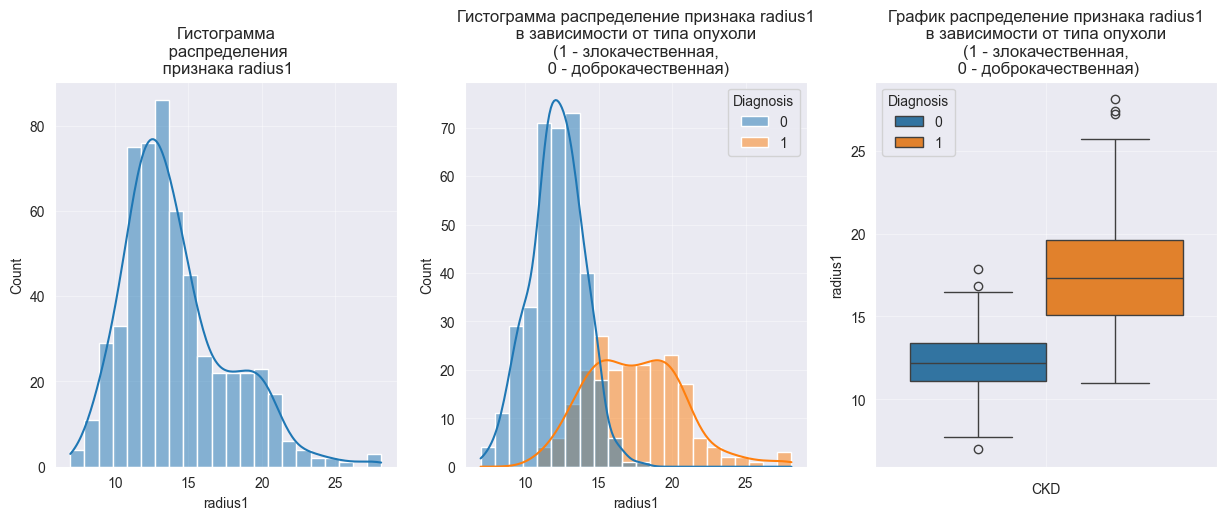

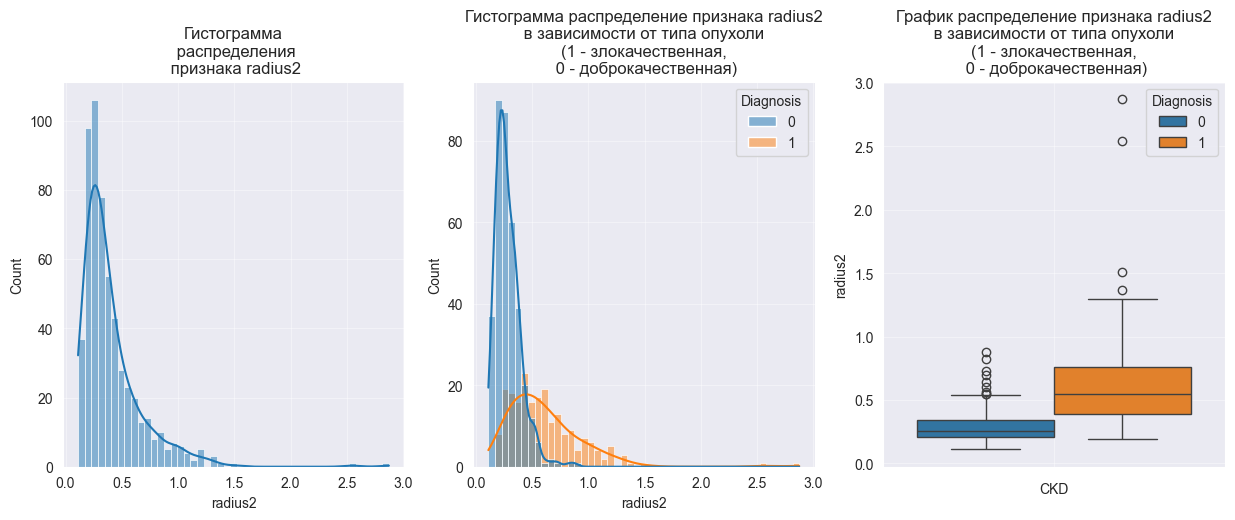

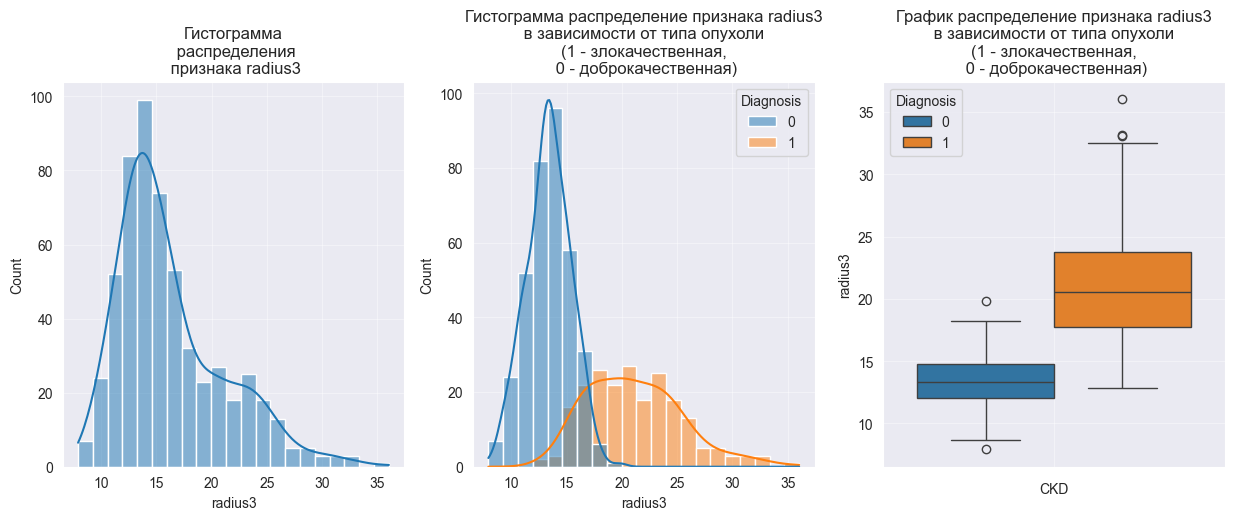

In [625]:
multi_features_assessment(data, TARGET_VAR, ['radius1', 'radius2', 'radius3'])

- *Признаки radius1, radius2, radius3: отмечается значительное различие в распределении признака в группах с разными типами новообразований (злокачественных и доброкачественных), - отмечается тенденция к большему значению признака в группах со злокачественным новообразованием, что может быть важным при построении модели.*

- *Распределение признаков radius1, radius3 близко к нормальному (учитываются средние графики в каждом ряду - где учитывается распределение признака в зависимости от целевой переменной).*

 - **Распределение признака radius2 напоминает логнормальное, возможно, в дальнейшем логарифмируем данный признак для использования в модели.**

- *Выбросы:*
   - *radius1 - есть несколько выбросов в обеих группах. "Выбросы выше верхней границы в группе 1 и выбросы ниже границы в группе 0 оставим, т.к.по логике формирования признака, чем больше значение в группе 1 и меньше значение в группе 0, тем больше вероятность злокачественности/доброкачественности соответственно. Выбросы "выше верхней границы" в группе 0 добавим в общий список для дальнейшего удаления.*
   - *radius2 - распределение напоминает логнормальное, поэтому нельзя адекватно оценить выбросы, прологарифмируем признак и оценим выбросы.*

In [626]:
features_log_list.append('radius2')  # Добавление признака radius2 в список для логарифмирования

### **Признаки определения разницы в интенсивности оттенков серого**

Описательная статистика  для переменной texture1 в зависимости от диагноза:


count   mean   std    min    25%    50%    75%    max
Diagnosis                                                       
0          357.0  17.91  4.00   9.71  15.15  17.39  19.76  33.81
1          212.0  21.60  3.78  10.38  19.33  21.46  23.76  39.28

Описательная статистика  для переменной texture2 в зависимости от диагноза:


count  mean   std   min   25%   50%   75%   max
Diagnosis                                                 
0          357.0  1.22  0.59  0.36  0.80  1.11  1.49  4.88
1          212.0  1.21  0.48  0.36  0.89  1.10  1.43  3.57

Описательная статистика  для переменной texture3 в зависимости от диагноза:


count   mean   std    min    25%    50%    75%    max
Diagnosis                                                       
0          357.0  23.52  5.49  12.02  19.58  22.82  26.51  41.78
1          212.0  29.32  5.43  16.67  25.78  28.94  32.69  49.54

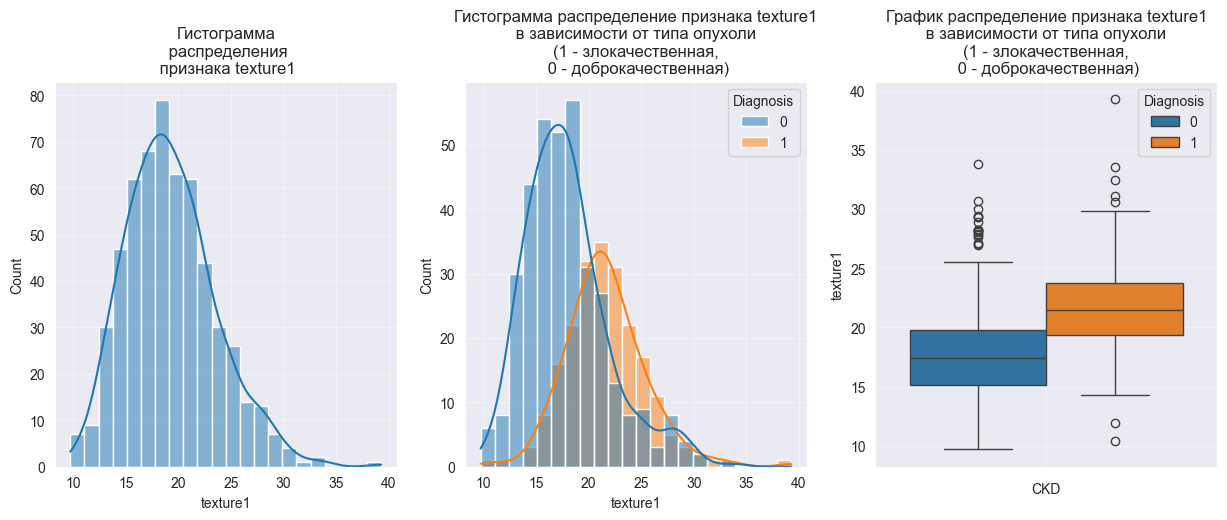

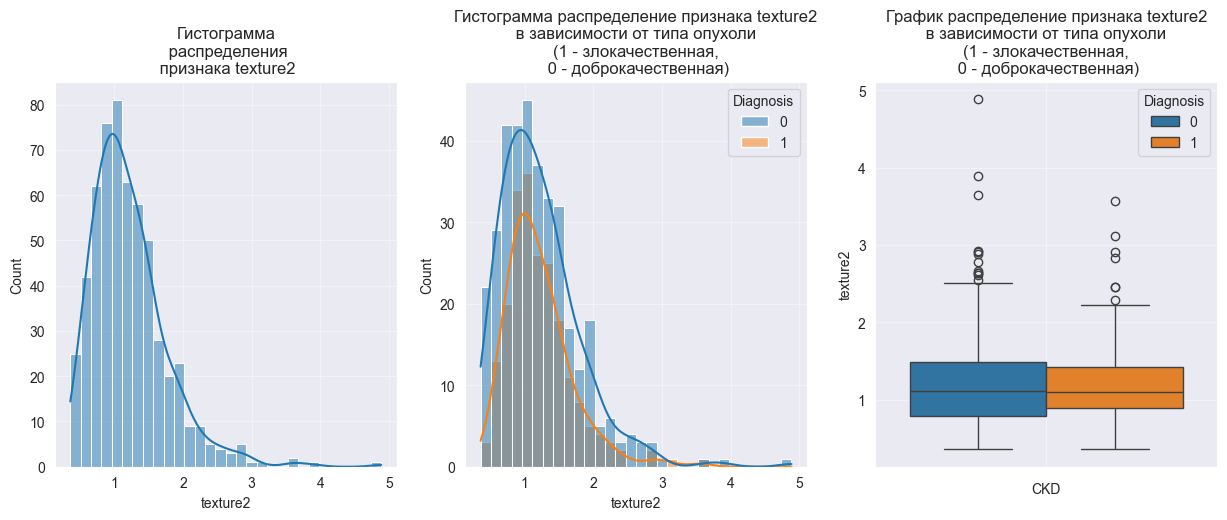

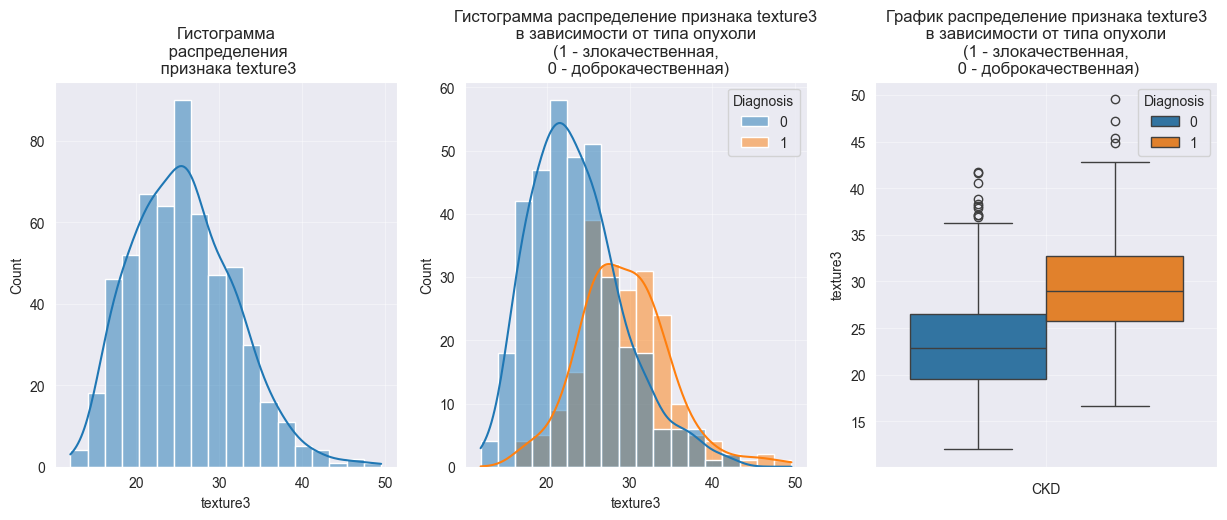

In [627]:
multi_features_assessment(data, TARGET_VAR, ['texture1', 'texture2', 'texture3'])

- *texture1: отмечается значительное различие в распределении признака в группах с разными типами новообразований (злокачественных и доброкачественных), поэтому признак может быть важен для предсказания - отмечается тенденция к большему значению признака в группах со злокачественным новообразованием. Есть выбросы.*

- **Распределение признака texture2 напоминает лог нормальное, кроме того, нет разницы в распределении признака в зависимости от целевой переменной, медианы в обеих групп на графиках  совпадают. Это может указывать на отсутствие влияние на предсказание, поэтому данный признак можно удалить.**
- *texture3: отмечается значительное различие в распределении признака в группах с разными типами новообразований (злокачественных и доброкачественных), — отмечается тенденция к бОльшему значению признака в группах со злокачественным новообразованием, есть выбросы в обеих группах выше верхней границы диаграммы.*

In [628]:
features_del_list.append('texture2')  # Добавление признака texture2 в список для удаления

### **Признаки длины "окружности" клеточного ядра**

Описательная статистика  для переменной perimeter1 в зависимости от диагноза:


count    mean    std    min    25%     50%     75%    max
Diagnosis                                                           
0          357.0   78.08  11.81  43.79  70.87   78.18   86.10  114.6
1          212.0  115.37  21.85  71.90  98.74  114.20  129.93  188.5

Описательная статистика  для переменной perimeter2 в зависимости от диагноза:


count  mean   std   min   25%   50%   75%    max
Diagnosis                                                  
0          357.0  2.00  0.77  0.76  1.44  1.85  2.39   5.12
1          212.0  4.32  2.57  1.33  2.72  3.68  5.21  21.98

Описательная статистика  для переменной perimeter3 в зависимости от диагноза:


count    mean    std    min     25%     50%     75%    max
Diagnosis                                                            
0          357.0   87.01  13.53  50.41   78.27   86.92   96.59  127.1
1          212.0  141.37  29.46  85.10  119.32  138.00  159.80  251.2

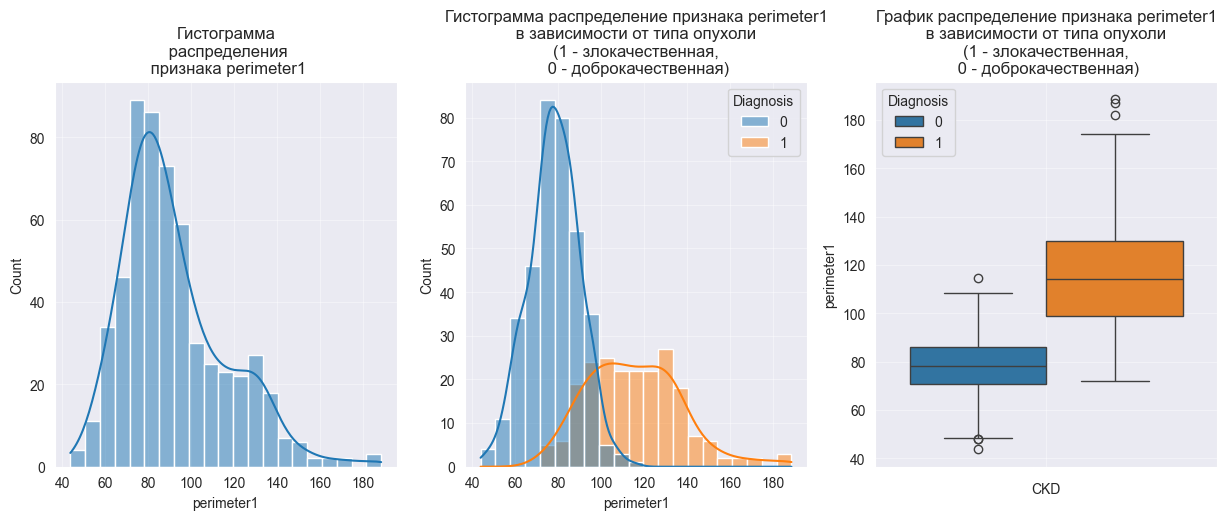

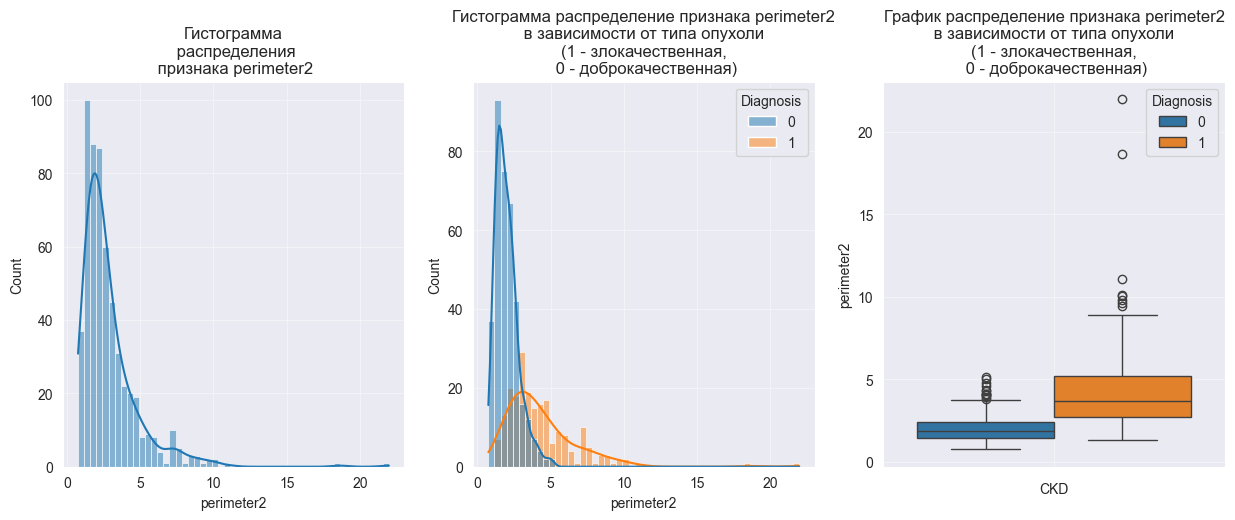

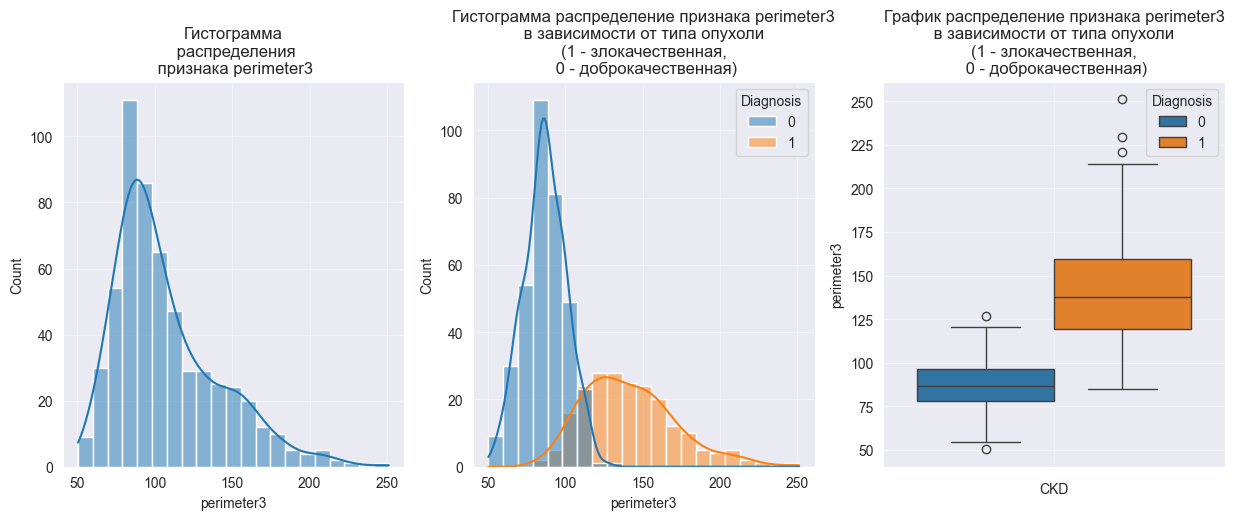

In [629]:
multi_features_assessment(data, TARGET_VAR, ['perimeter1', 'perimeter2', 'perimeter3'])

- *perimeter1: отмечается значительное различие в распределении признака в группах с разными типами новообразований (злокачественных и доброкачественных), поэтому признак может быть важен для предсказания - отмечается тенденция к большему значению признака в группах со злокачественным новообразованием. Есть выбросы.*

- **perimeter2: распределение признака напоминает лог нормальное, есть выбросы, которые сложно оценивать, т.к. распределение признака не нормальное. произведем логарифмирование признака и оценим выбросы.**

- *perimeter3: отмечается значительное различие в распределении признака в группах с разными типами новообразований (злокачественных и доброкачественных), - отмечается тенденция к бщльшему значению признака в группах со злокачественным новообразованием, есть выбросы в обеих группах.*

In [630]:
features_log_list.append('perimeter2')  # Добавление признака perimeter2 в список для логарифмирования

### **Признаки площади ядра**

Описательная статистика  для переменной area1 в зависимости от диагноза:


count    mean     std    min    25%    50%      75%     max
Diagnosis                                                             
0          357.0  462.79  134.29  143.5  378.2  458.4   551.10   992.1
1          212.0  978.38  367.94  361.6  705.3  932.0  1203.75  2501.0

Описательная статистика  для переменной area2 в зависимости от диагноза:


count   mean    std    min    25%    50%    75%     max
Diagnosis                                                         
0          357.0  21.14   8.84   6.80  15.26  19.63  25.03   77.11
1          212.0  72.67  61.36  13.99  35.76  58.46  94.00  542.20

Описательная статистика  для переменной area3 в зависимости от диагноза:


count     mean     std    min    25%     50%      75%     max
Diagnosis                                                               
0          357.0   558.90  163.60  185.2  447.1   547.4   670.00  1210.0
1          212.0  1422.29  597.97  508.1  970.3  1303.0  1712.75  4254.0

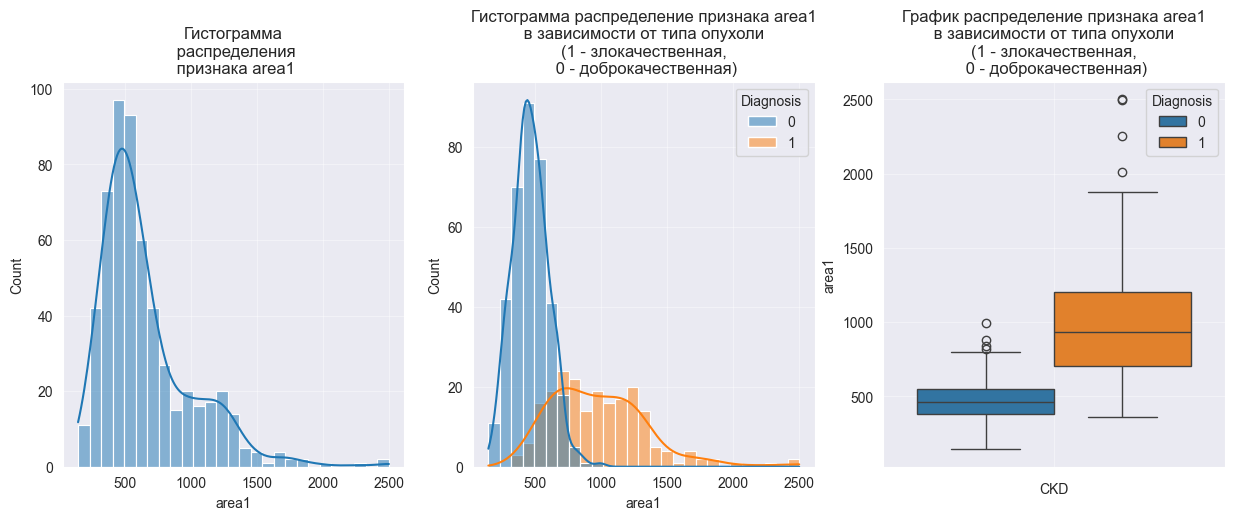

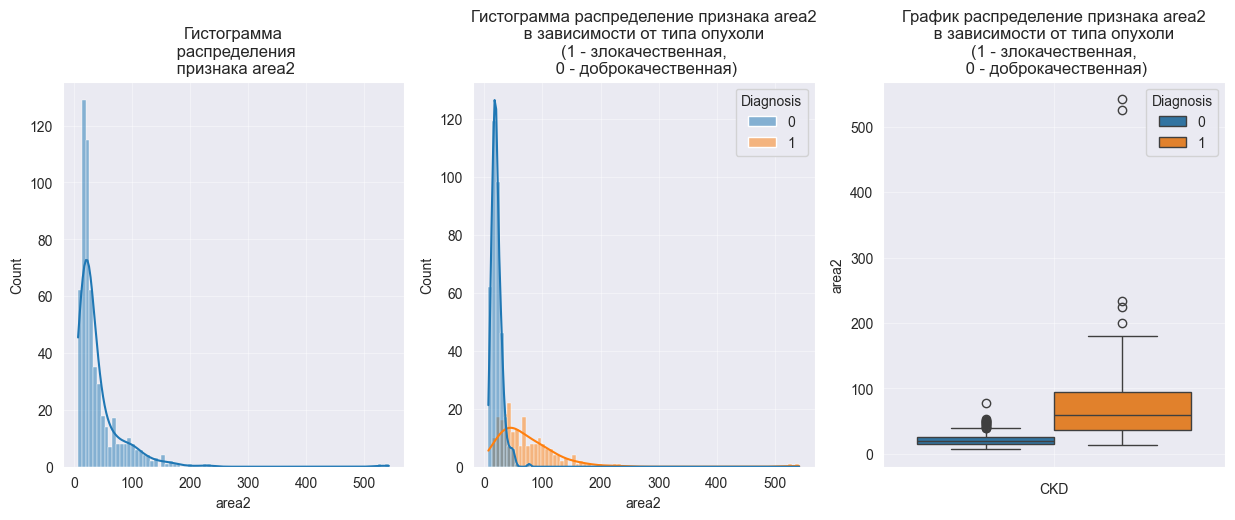

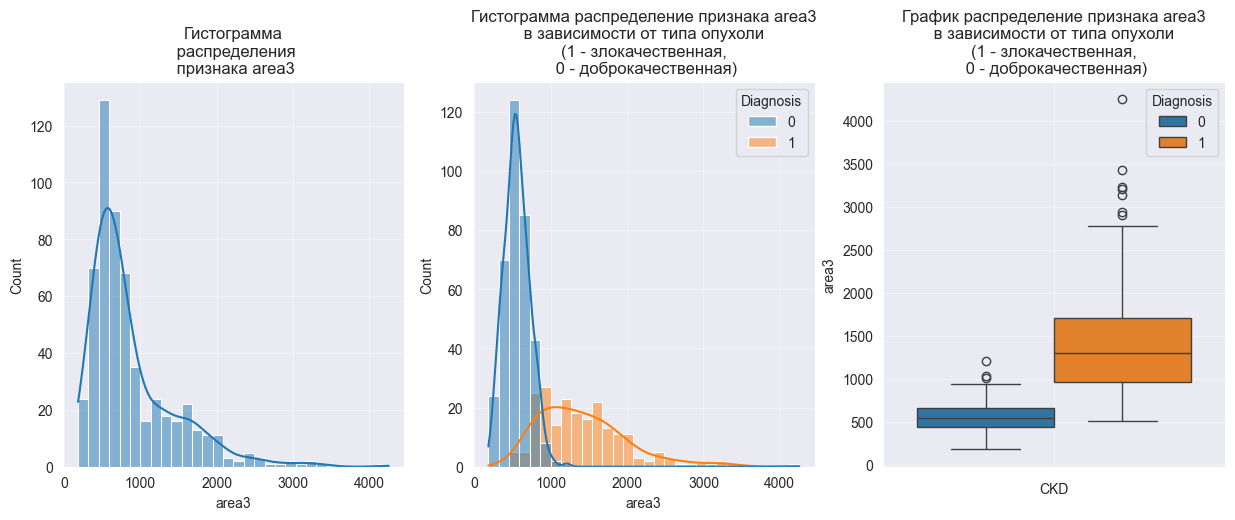

In [631]:
multi_features_assessment(data, TARGET_VAR, ['area1', 'area2', 'area3'])

- *area1: отмечается значительное различие в распределении признака в группах с разными типами новообразований (злокачественных и доброкачественных), поэтому признак может быть важен для предсказания - отмечается тенденция к большему значению признака в группах со злокачественным новообразованием. Есть выбросы.*

- **признак area2: распределение признака напоминает лог нормальное, есть выбросы, которые сложно оценивать, т.к. распределение признака не нормальное. произведем логарифмирование признака и оценим выбросы.**
- *признак area3: отмечается значительное различие в распределении признака в группах с разными типами новообразований (злокачественных и доброкачественных), - отмечается тенденция к большему значению признака в группах со злокачественным новообразованием, есть выбросы в обеих группах.*

In [632]:
features_log_list.append('area2')  # Добавление признака area2 в список для логарифмирования

### **Признаки локальные вариации длины радиуса клеточного ядра**

Описательная статистика  для переменной smoothness1 в зависимости от диагноза:


count  mean   std   min   25%   50%   75%   max
Diagnosis                                                 
0          357.0  0.09  0.01  0.05  0.08  0.09  0.10  0.16
1          212.0  0.10  0.01  0.07  0.09  0.10  0.11  0.14

Описательная статистика  для переменной smoothness2 в зависимости от диагноза:


count  mean  std  min   25%   50%   75%   max
Diagnosis                                               
0          357.0  0.01  0.0  0.0  0.01  0.01  0.01  0.02
1          212.0  0.01  0.0  0.0  0.01  0.01  0.01  0.03

Описательная статистика  для переменной smoothness3 в зависимости от диагноза:


count  mean   std   min   25%   50%   75%   max
Diagnosis                                                 
0          357.0  0.12  0.02  0.07  0.11  0.13  0.14  0.20
1          212.0  0.14  0.02  0.09  0.13  0.14  0.16  0.22

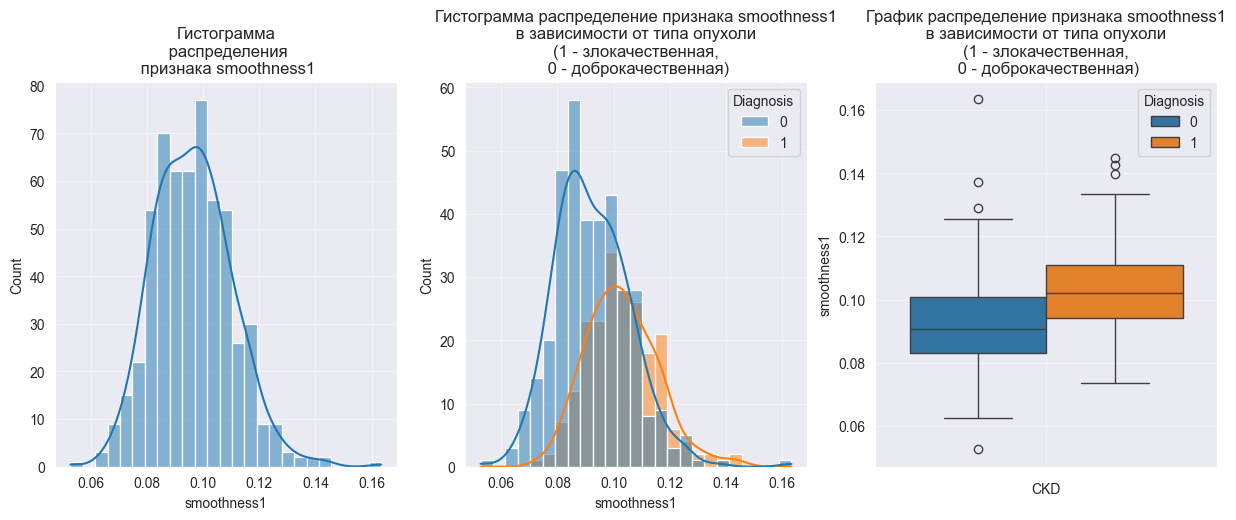

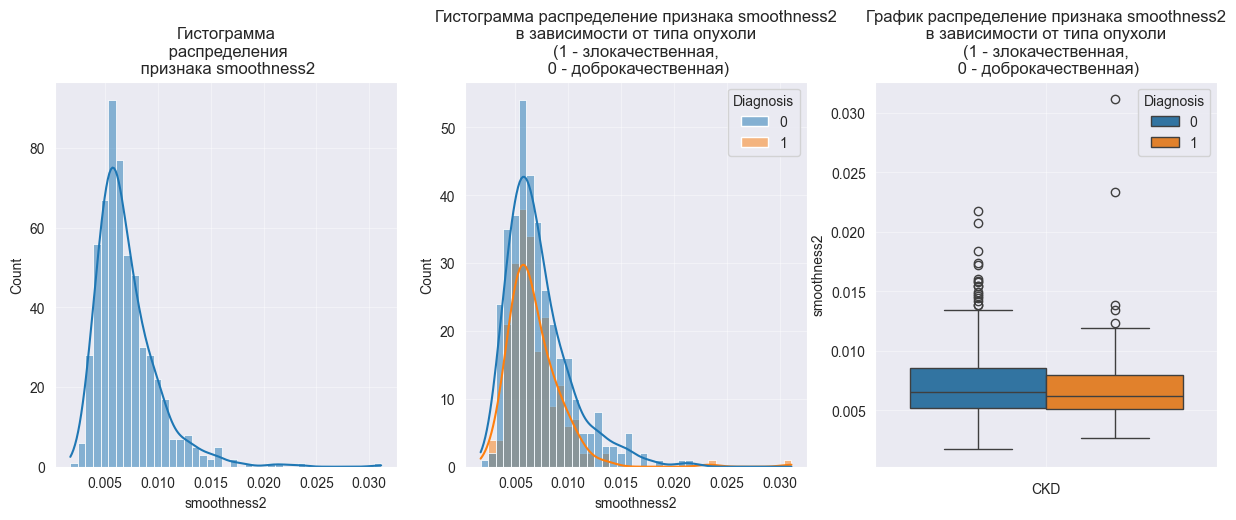

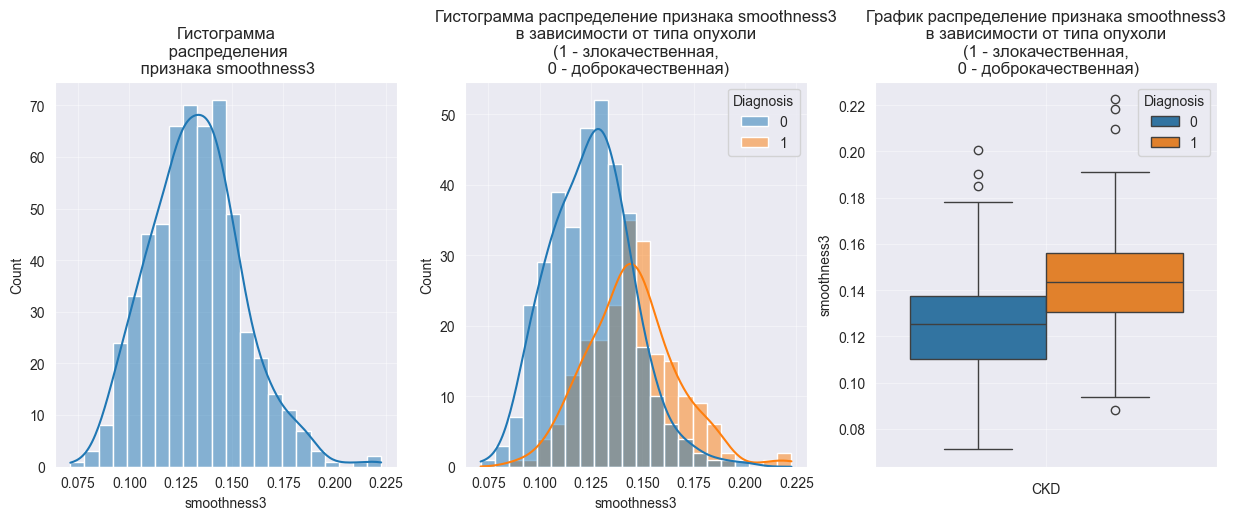

In [633]:
multi_features_assessment(data, TARGET_VAR, ['smoothness1', 'smoothness2', 'smoothness3'])

- *smoothness1: отмечается различие в распределении признака в группах с разными типами новообразований (злокачественных и доброкачественных), поэтому признак может быть важен для предсказания - отмечается тенденция к большему значению признака в группах со злокачественным новообразованием. Есть выбросы.*

- **smoothness2: распределение признака напоминает лог нормальное, есть выбросы, распределение признака в обеих группах одинаковое (медианы совпадают), что может говорить о неважности данного признака для предсказания. удалим его.**

- *smoothness3: отмечается значительное различие в распределении признака в группах с разными типами новообразований (злокачественных и доброкачественных), — отмечается тенденция к большему значению признака в группах со злокачественным новообразованием, есть выбросы в обеих группах.*

In [634]:
features_del_list.append('smoothness2')  # Добавление признака smoothness2 в список для удаления

### **Признаки компактности**

Описательная статистика  для переменной compactness1 в зависимости от диагноза:


count  mean   std   min   25%   50%   75%   max
Diagnosis                                                 
0          357.0  0.08  0.03  0.02  0.06  0.08  0.10  0.22
1          212.0  0.15  0.05  0.05  0.11  0.13  0.17  0.35

Описательная статистика  для переменной compactness2 в зависимости от диагноза:


count  mean   std   min   25%   50%   75%   max
Diagnosis                                                 
0          357.0  0.02  0.02  0.00  0.01  0.02  0.03  0.11
1          212.0  0.03  0.02  0.01  0.02  0.03  0.04  0.14

Описательная статистика  для переменной compactness3 в зависимости от диагноза:


count  mean   std   min   25%   50%   75%   max
Diagnosis                                                 
0          357.0  0.18  0.09  0.03  0.11  0.17  0.23  0.58
1          212.0  0.37  0.17  0.05  0.24  0.36  0.45  1.06

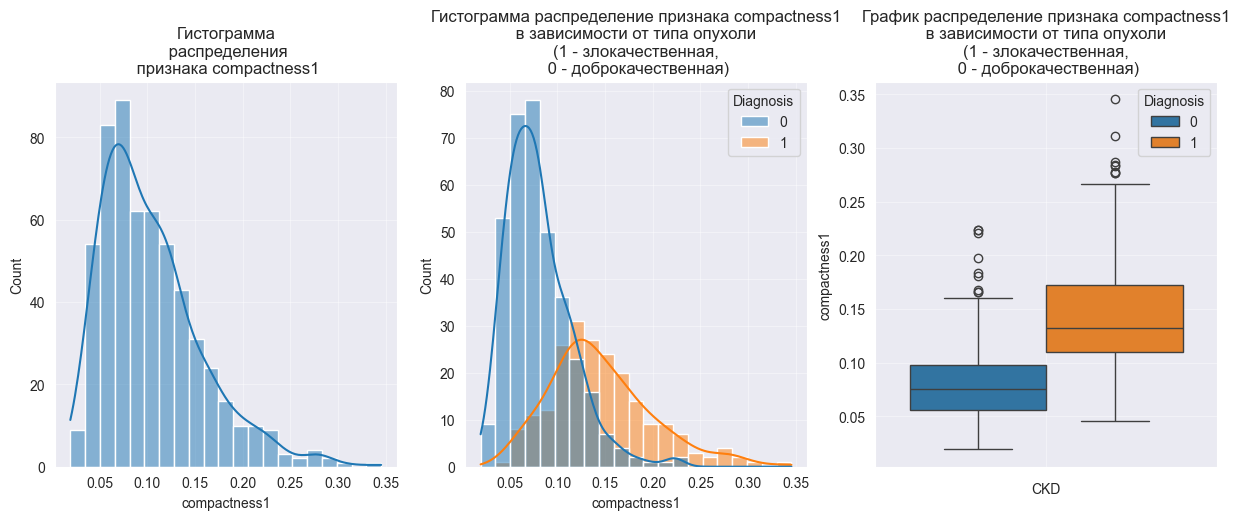

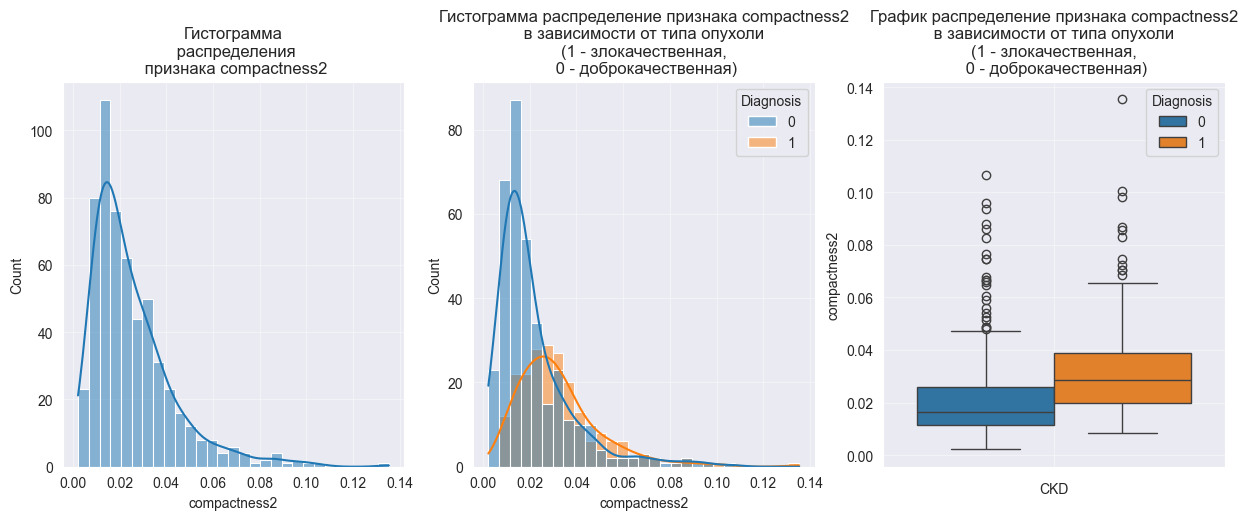

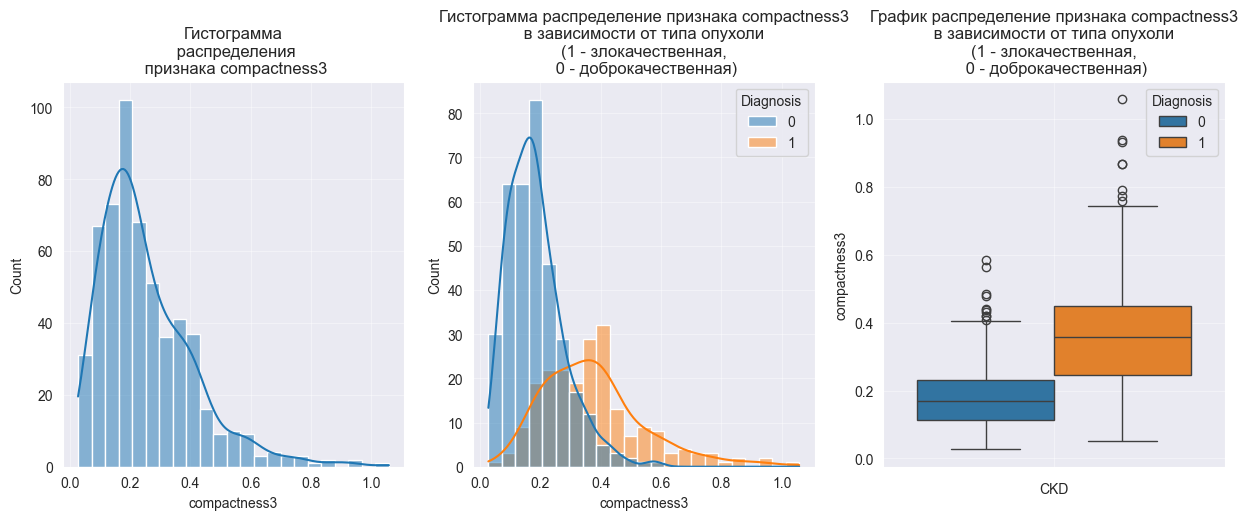

In [635]:
multi_features_assessment(data, TARGET_VAR, ['compactness1', 'compactness2', 'compactness3'])

- признак 'compactness1': отмечается значительное различие в распределении признака в группах с разными типами новообразований (злокачественных и доброкачественных), поэтому признак может быть важен для предсказания - отмечается тенденция к бОльшему значению признака в группах со злокачественным новообразованием. Есть выбросы.

- признак 'compactness2': распределение признака напоминает логнормальное, есть выбросы, которые сложно оценивать, т.к. распределение признака не нормальное. произведем логарифмирование признака и оценим выбросы.

- признак 'compactness3': отмечается значительное различие в распределении признака в группах с разными типами новообразований (злокачественных и доброкачественных), - отмечается тенденция к бОльшему значению признака в группах со злокачественным новообразованием, есть выбросы в обеих группах.

In [636]:
features_log_list.append('compactness2')  # Добавление признака compactness2 в список для логарифмирования

### **Признаки степени вогнутости контура клеточного ядра**

Описательная статистика  для переменной concavity1 в зависимости от диагноза:


count  mean   std   min   25%   50%   75%   max
Diagnosis                                                 
0          357.0  0.05  0.04  0.00  0.02  0.04  0.06  0.41
1          212.0  0.16  0.08  0.02  0.11  0.15  0.20  0.43

Описательная статистика  для переменной concavity2 в зависимости от диагноза:


count  mean   std   min   25%   50%   75%   max
Diagnosis                                                 
0          357.0  0.03  0.03  0.00  0.01  0.02  0.03  0.40
1          212.0  0.04  0.02  0.01  0.03  0.04  0.05  0.14

Описательная статистика  для переменной concavity3 в зависимости от диагноза:


count  mean   std   min   25%   50%   75%   max
Diagnosis                                                 
0          357.0  0.17  0.14  0.00  0.08  0.14  0.22  1.25
1          212.0  0.45  0.18  0.02  0.33  0.40  0.56  1.17

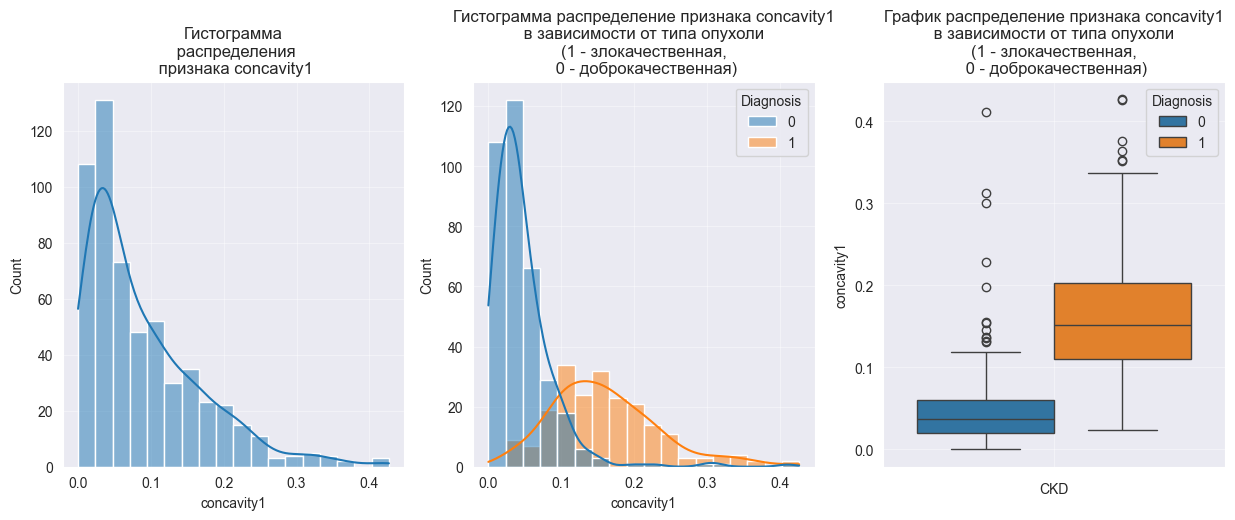

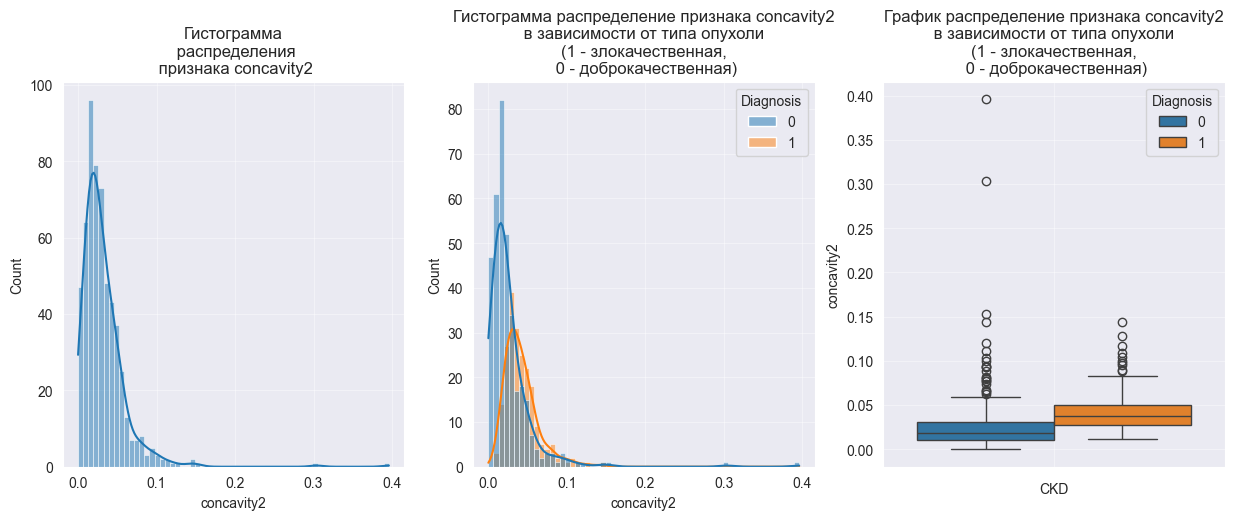

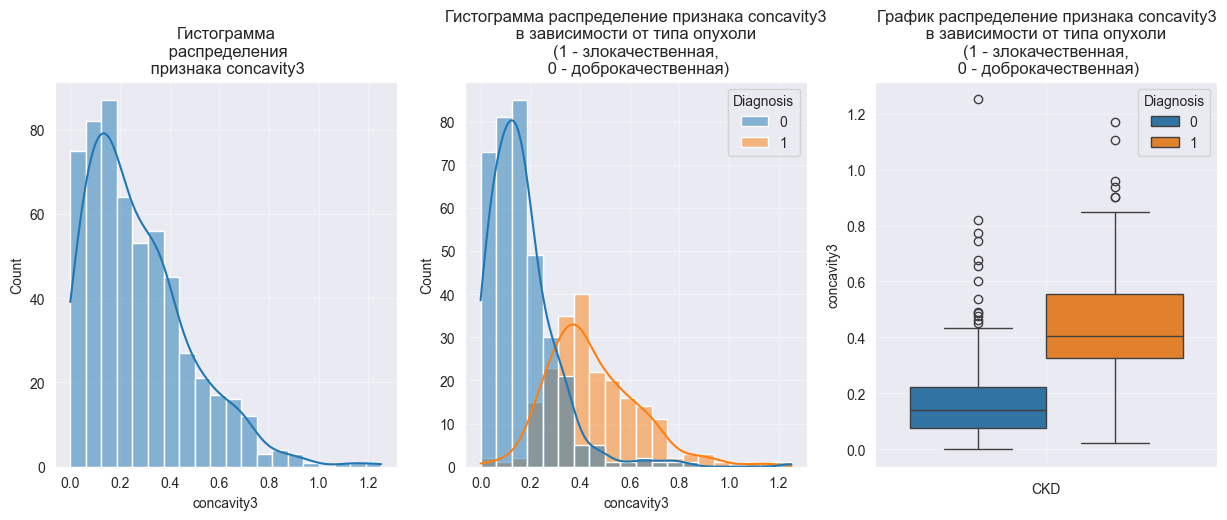

In [637]:
multi_features_assessment(data, TARGET_VAR, ['concavity1', 'concavity2', 'concavity3'])

- признак concavity1: отмечается значительное различие в распределении признака в группах с разными типами новообразований (злокачественных и доброкачественных), поэтому признак может быть важен для предсказания - отмечается тенденция к бОльшему значению признака в группах со злокачественным новообразованием. Есть выбросы.
- признак concavity2: распределение признака напоминает логнормальное, есть выбросы, которые сложно оценивать, т.к. распределение признака не нормальное. произведем логарифмирование признака и оценим выбросы.
- признак concavity3: отмечается значительное различие в распределении признака в группах с разными типами новообразований (злокачественных и доброкачественных), - отмечается тенденция к бОльшему значению признака в группах со злокачественным новообразованием, есть выбросы в обеих группах.

In [638]:
features_log_list.append('concavity2')  # Добавление признака concavity2 в список для логарифмирования

### **Признаки количества "вогнутостей"**

Описательная статистика  для переменной concave_points1 в зависимости от диагноза:


count  mean   std   min   25%   50%   75%   max
Diagnosis                                                 
0          357.0  0.03  0.02  0.00  0.02  0.02  0.03  0.09
1          212.0  0.09  0.03  0.02  0.06  0.09  0.10  0.20

Описательная статистика  для переменной concave_points2 в зависимости от диагноза:


count  mean   std   min   25%   50%   75%   max
Diagnosis                                                 
0          357.0  0.01  0.01  0.00  0.01  0.01  0.01  0.05
1          212.0  0.02  0.01  0.01  0.01  0.01  0.02  0.04

Описательная статистика  для переменной concave_points3 в зависимости от диагноза:


count  mean   std   min   25%   50%   75%   max
Diagnosis                                                 
0          357.0  0.07  0.04  0.00  0.05  0.07  0.10  0.18
1          212.0  0.18  0.05  0.03  0.15  0.18  0.21  0.29

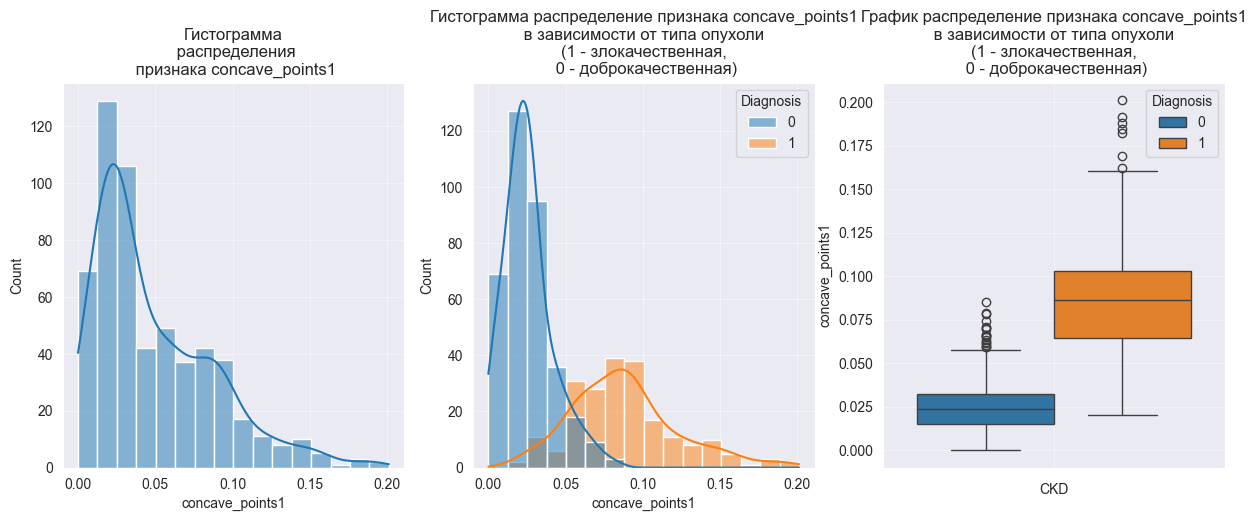

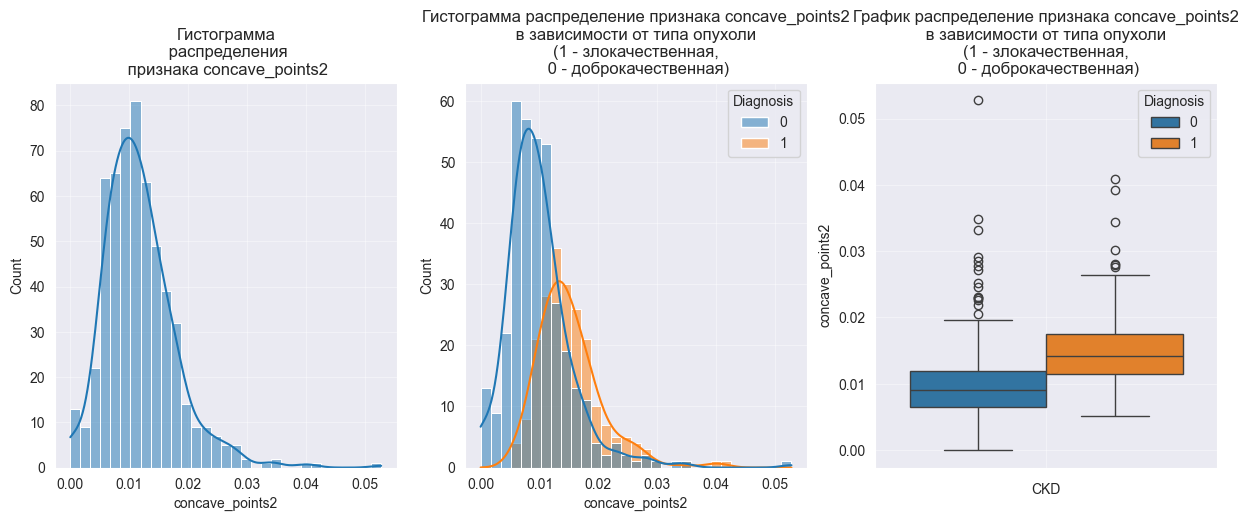

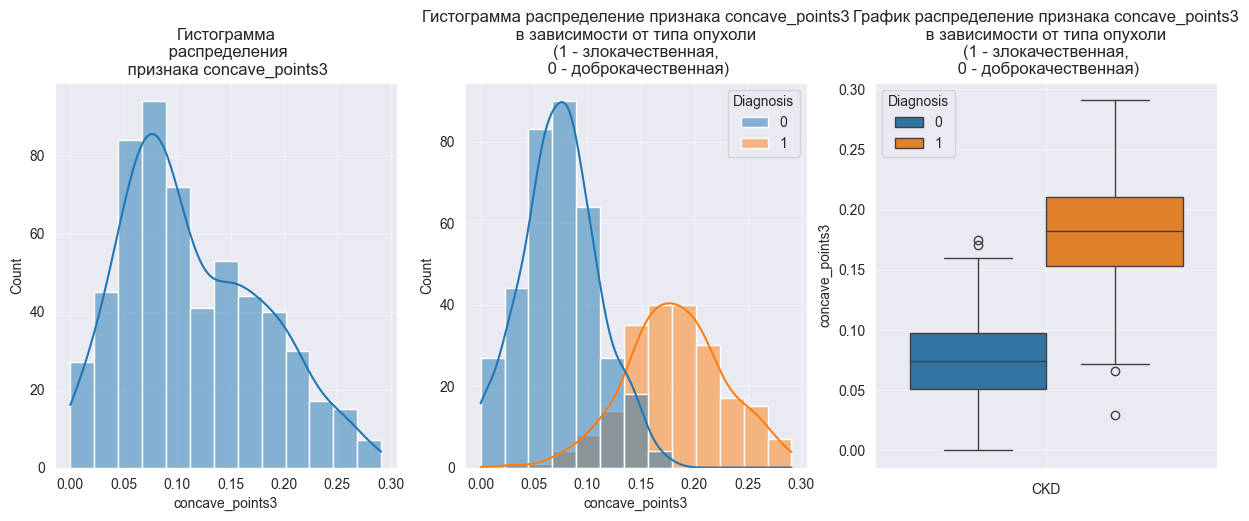

In [639]:
multi_features_assessment(data, TARGET_VAR, ['concave_points1', 'concave_points2', 'concave_points3'])

- признаки 'concave_points1', 'concave_points2', 'concave_points3': отмечается значительное различие в распределении признака в группах с разными типами новообразований (злокачественных и доброкачественных), поэтому признаки могут быть важны для предсказания - отмечается тенденция к бОльшему значению признаков в группах со злокачественным новообразованием. Есть выбросы.

### **Признаки симметрии клеточного ядра**

Описательная статистика  для переменной symmetry1 в зависимости от диагноза:


count  mean   std   min   25%   50%   75%   max
Diagnosis                                                 
0          357.0  0.17  0.02  0.11  0.16  0.17  0.19  0.27
1          212.0  0.19  0.03  0.13  0.17  0.19  0.21  0.30

Описательная статистика  для переменной symmetry2 в зависимости от диагноза:


count  mean   std   min   25%   50%   75%   max
Diagnosis                                                 
0          357.0  0.02  0.01  0.01  0.02  0.02  0.02  0.06
1          212.0  0.02  0.01  0.01  0.01  0.02  0.02  0.08

Описательная статистика  для переменной symmetry3 в зависимости от диагноза:


count  mean   std   min   25%   50%   75%   max
Diagnosis                                                 
0          357.0  0.27  0.04  0.16  0.24  0.27  0.30  0.42
1          212.0  0.32  0.07  0.16  0.28  0.31  0.36  0.66

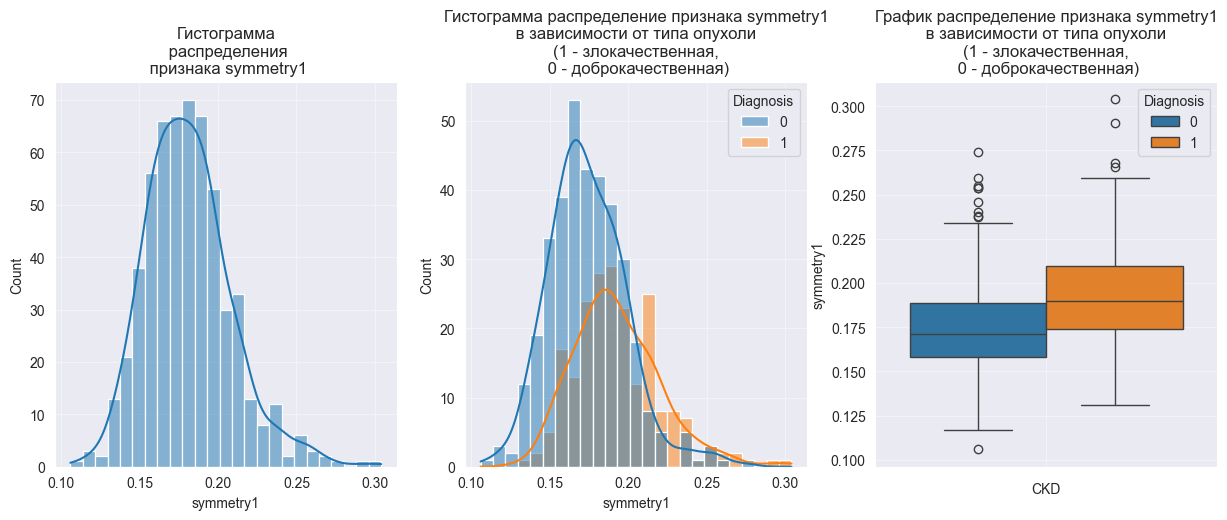

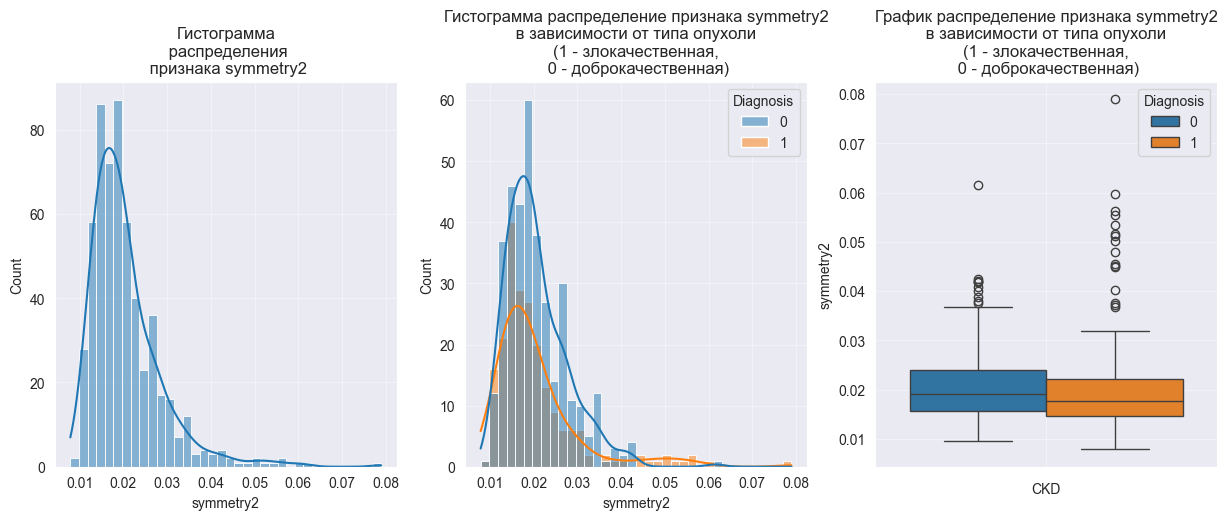

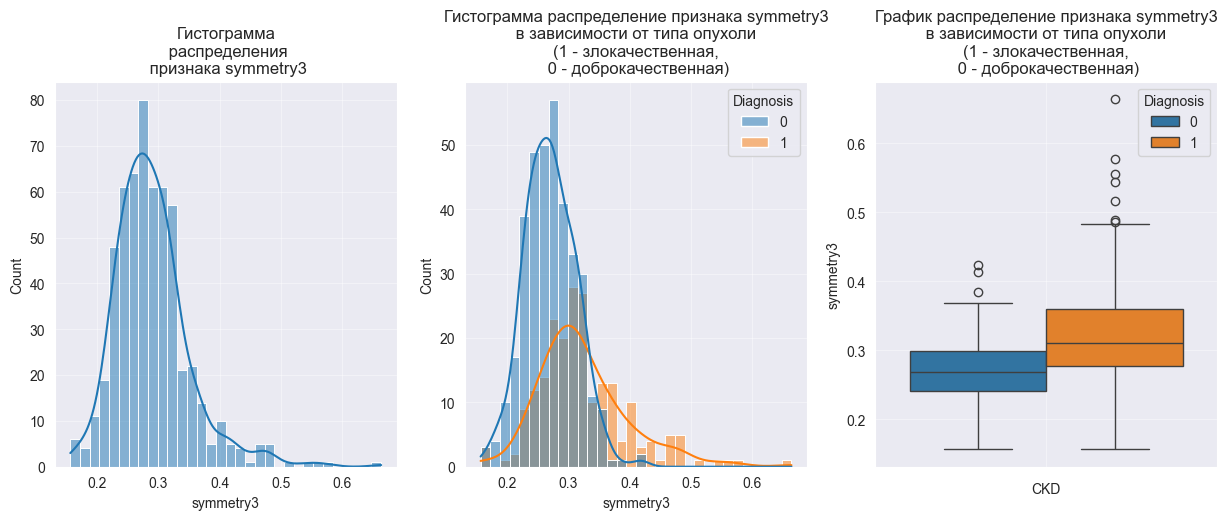

In [640]:
multi_features_assessment(data, TARGET_VAR, ['symmetry1', 'symmetry2', 'symmetry3'])

- признак 'symmetry1': отмечается различие в распределении признака в группах с разными типами новообразований (злокачественных и доброкачественных), признак может быть важен для предсказания - отмечается тенденция к бОльшему значению признака в группах со злокачественным новообразованием. Есть выбросы.
- признак 'symmetry2': распределение признака напоминает логнормальное, есть выбросы, медиана в группе с доброкачественным новообразованием чуть ниже, чем в группе со злокачественным новообразованием. Выше по всем признакам мы видели тенденцию: бОльшие значения в группе со злокачественным новообразованием. Учитывая отсутсвие различия в распределении признака внутри группы, значит, потенциально он может быть не важен для прогнозирования модели, данный признак можно удалить.
- признак 'symmetry3': отмечается различие в распределении признака в группах с разными типами новообразований (злокачественных и доброкачественных), - отмечается тенденция к бОльшему значению признака в группах со злокачественным новообразованием, есть выбросы в обеих группах.

In [641]:
features_del_list.append('symmetry2')  # Добавление признака symmetry2 в список для удаления

### **Признаки фрактальной размерности**

Описательная статистика  для переменной fractal_dimension1 в зависимости от диагноза:


count  mean   std   min   25%   50%   75%  max
Diagnosis                                                
0          357.0  0.06  0.01  0.05  0.06  0.06  0.07  0.1
1          212.0  0.06  0.01  0.05  0.06  0.06  0.07  0.1

Описательная статистика  для переменной fractal_dimension2 в зависимости от диагноза:


count  mean  std  min  25%  50%  75%   max
Diagnosis                                            
0          357.0   0.0  0.0  0.0  0.0  0.0  0.0  0.03
1          212.0   0.0  0.0  0.0  0.0  0.0  0.0  0.01

Описательная статистика  для переменной fractal_dimension3 в зависимости от диагноза:


count  mean   std   min   25%   50%   75%   max
Diagnosis                                                 
0          357.0  0.08  0.01  0.06  0.07  0.08  0.09  0.15
1          212.0  0.09  0.02  0.06  0.08  0.09  0.10  0.21

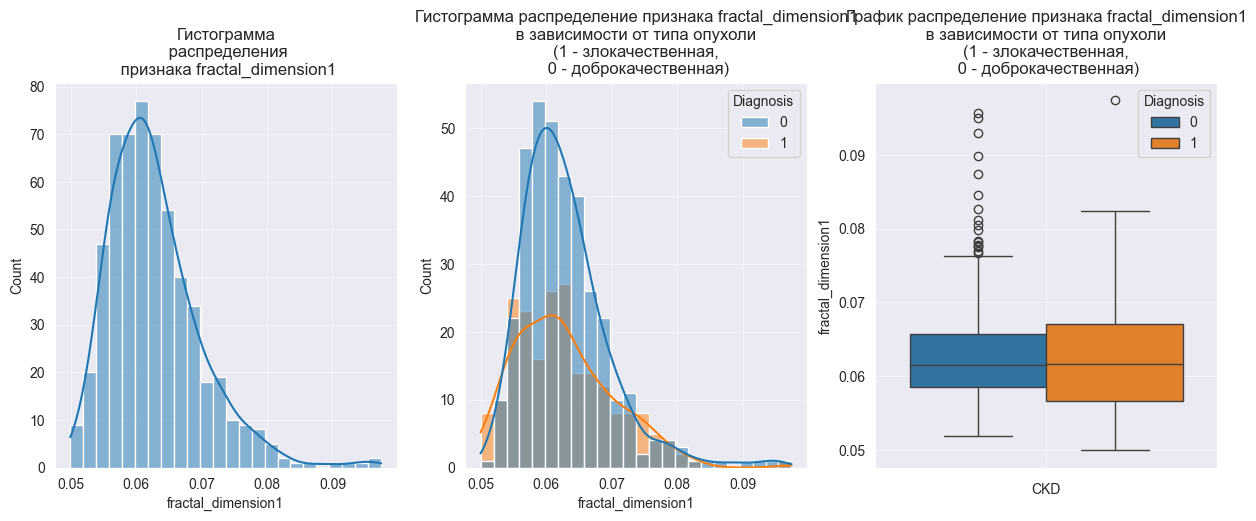

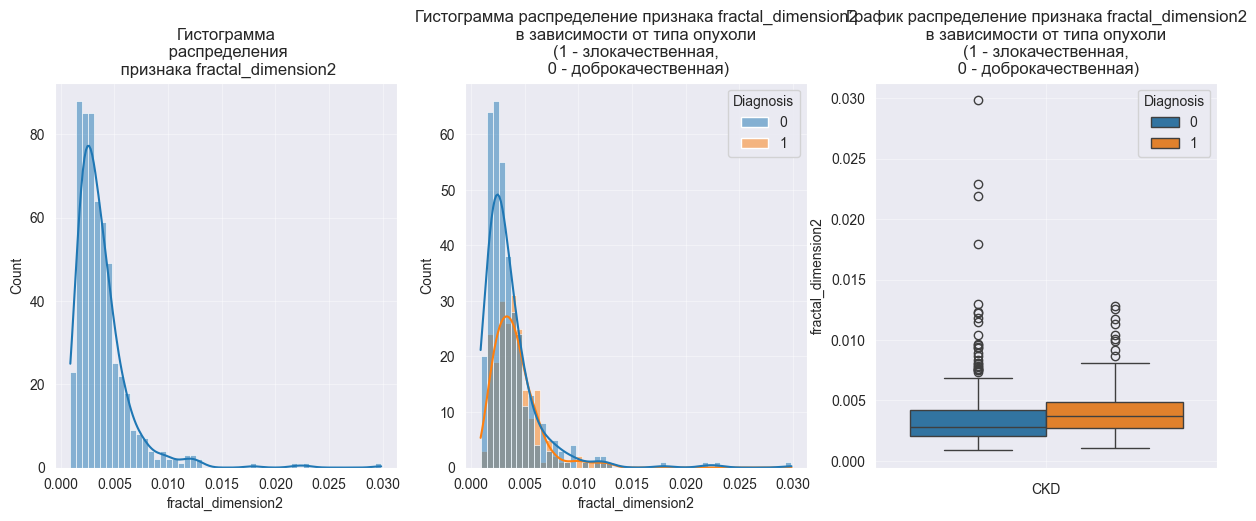

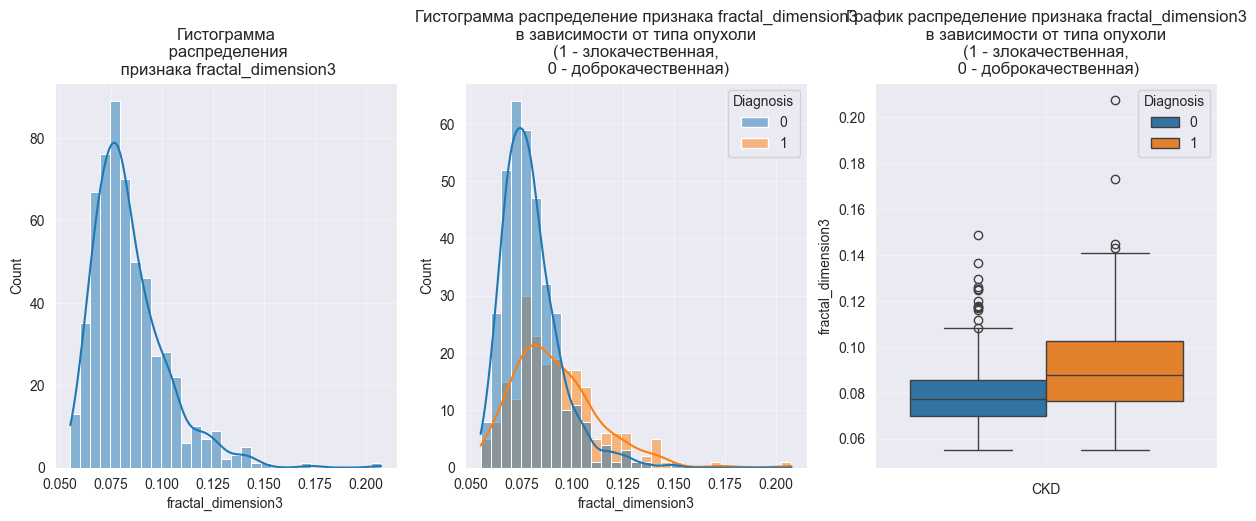

In [642]:
multi_features_assessment(data, TARGET_VAR, ['fractal_dimension1', 'fractal_dimension2', 'fractal_dimension3'])

- признак 'fractal_dimension1': практически нет различий в распределении признака в группах с разными типами новообразований (злокачественных и доброкачественных), поэтому признак потенциально неважен для предсказания - отмечается тенденция к бОльшему значению признака в группах со злокачественным новообразованием. В группе доброкачественных образований много выбросов. Удалим данный признак.
- признак 'fractal_dimension2': распределение признака напоминает логнормальное, есть выбросы, которые сложно оценивать, т.к. распределение признака не нормальное. произведем логарифмирование признака и оценим выбросы.
- признак 'fractal_dimension3': распределение признака напоминает логнормальное, есть выбросы, которые сложно оценивать, т.к. распределение признака не нормальное. произведем логарифмирование признака и оценим выбросы.

In [643]:
features_del_list.append('fractal_dimension1')  # Добавление признака fractal_dimension1 в список для удаления
features_log_list.append('fractal_dimension2')  # Добавление признака fractal_dimension2 в список для логарифмирования
features_log_list.append('fractal_dimension3')  # Добавление признака fractal_dimension3 в список для логарифмирования

## **Преобразование данных**

In [644]:
data_processed = data.copy()  # Создание копии датасета для обработки
data_processed.drop(features_del_list, axis=1, inplace=True)  # Удаление признаков из списка для удаления

for feature in features_log_list:
    data_processed[feature] = round(np.log(data[feature]),3)

Описательная статистика  для переменной radius2 в зависимости от диагноза:


count  mean   std   min   25%   50%   75%   max
Diagnosis                                                 
0          357.0 -1.33  0.37 -2.19 -1.57 -1.36 -1.07 -0.13
1          212.0 -0.62  0.50 -1.64 -0.94 -0.60 -0.28  1.06

Описательная статистика  для переменной perimeter2 в зависимости от диагноза:


count  mean   std   min   25%   50%   75%   max
Diagnosis                                                 
0          357.0  0.63  0.36 -0.28  0.37  0.62  0.87  1.63
1          212.0  1.33  0.50  0.29  1.00  1.30  1.65  3.09

Описательная статистика  для переменной area2 в зависимости от диагноза:


count  mean   std   min   25%   50%   75%   max
Diagnosis                                                 
0          357.0  2.97  0.39  1.92  2.72  2.98  3.22  4.34
1          212.0  4.06  0.65  2.64  3.58  4.07  4.54  6.30

Описательная статистика  для переменной compactness2 в зависимости от диагноза:


count  mean   std   min   25%   50%   75%   max
Diagnosis                                                 
0          357.0 -4.06  0.65 -6.10 -4.48 -4.12 -3.65 -2.24
1          212.0 -3.57  0.53 -4.78 -3.93 -3.55 -3.25 -2.00

Описательная статистика  для переменной concavity2 в зависимости от диагноза:


count  mean   std   min   25%   50%   75%   max
Diagnosis                                                 
0          357.0  -inf   NaN  -inf -4.51 -4.00 -3.49 -0.93
1          212.0 -3.29  0.48 -4.51 -3.61 -3.29 -2.99 -1.94

Описательная статистика  для переменной fractal_dimension2 в зависимости от диагноза:


count  mean   std   min   25%   50%   75%   max
Diagnosis                                                 
0          357.0 -5.80  0.55 -7.02 -6.18 -5.88 -5.48 -3.51
1          212.0 -5.61  0.46 -6.82 -5.92 -5.59 -5.32 -4.36

Описательная статистика  для переменной fractal_dimension3 в зависимости от диагноза:


count  mean   std  min   25%   50%   75%   max
Diagnosis                                                
0          357.0 -2.55  0.16 -2.9 -2.66 -2.56 -2.46 -1.91
1          212.0 -2.42  0.22 -2.9 -2.57 -2.44 -2.28 -1.57

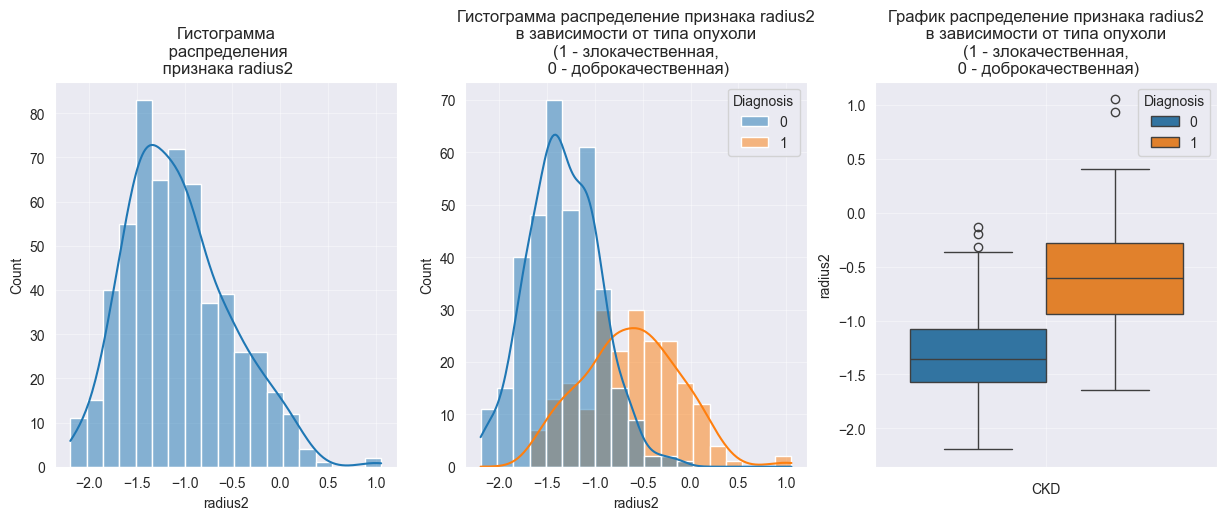

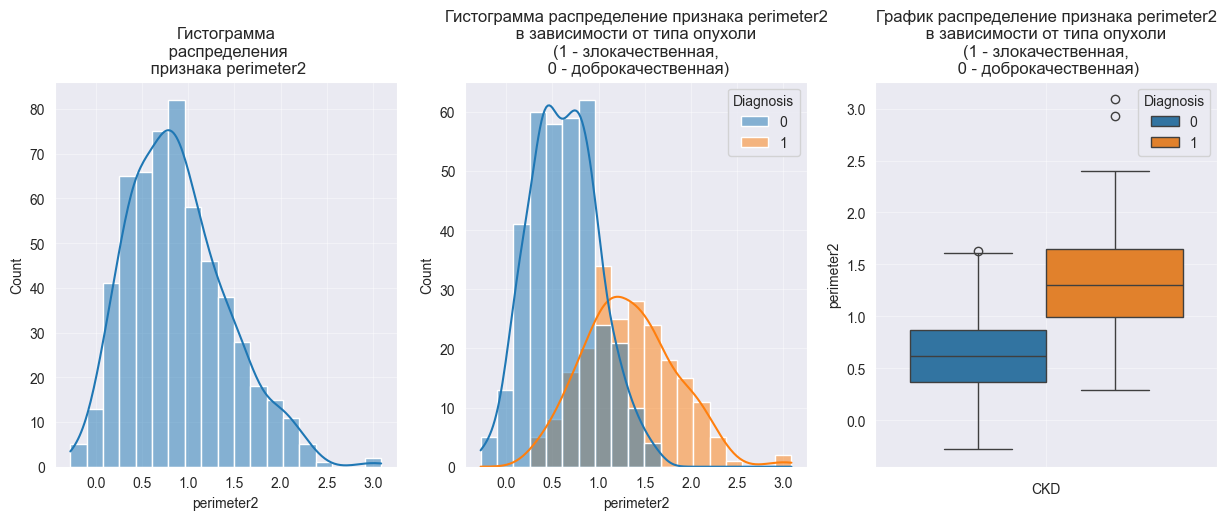

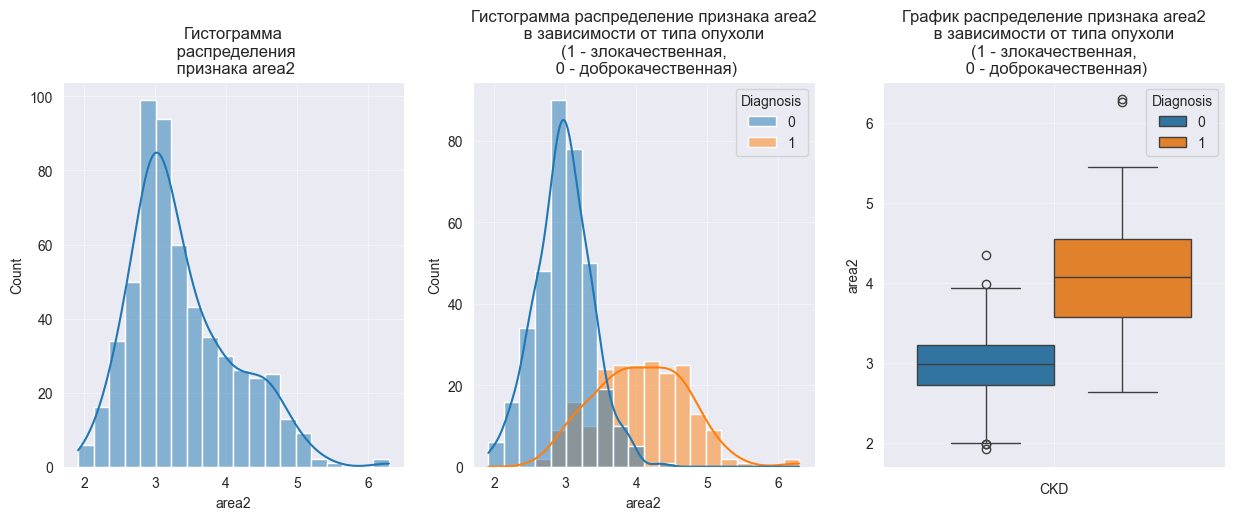

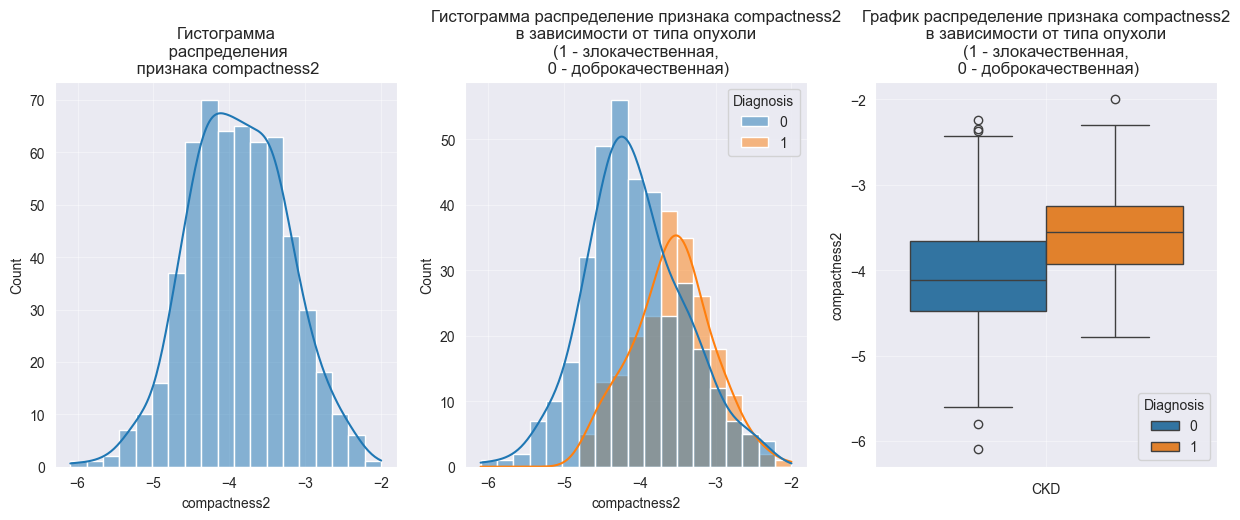

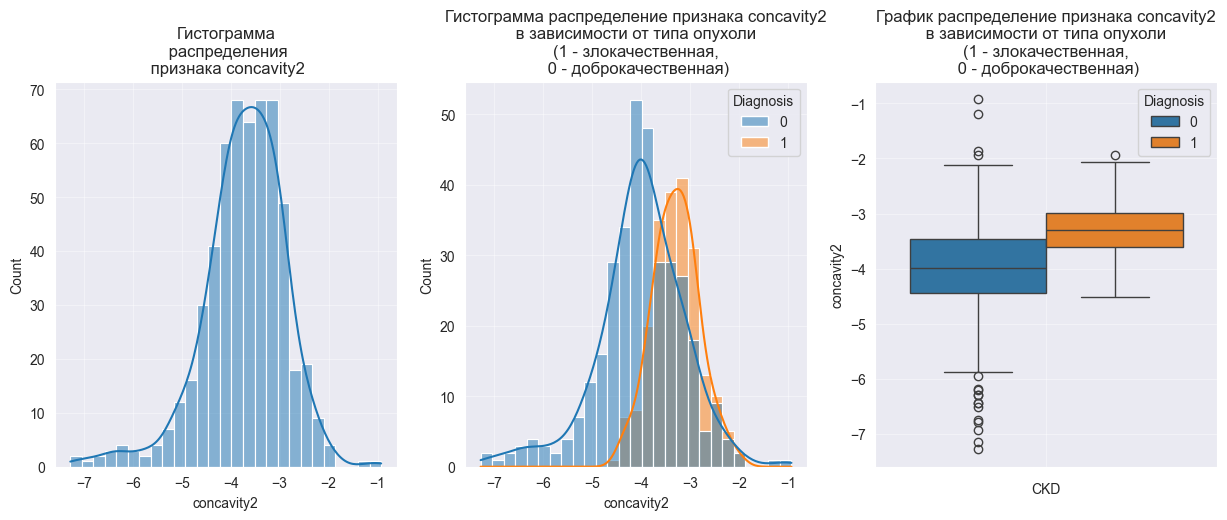

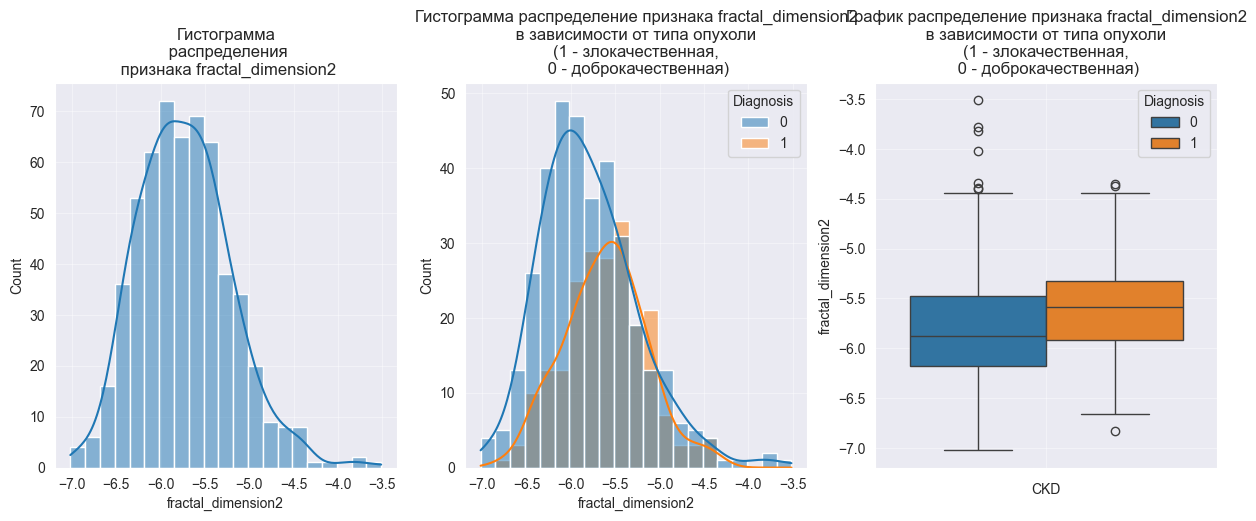

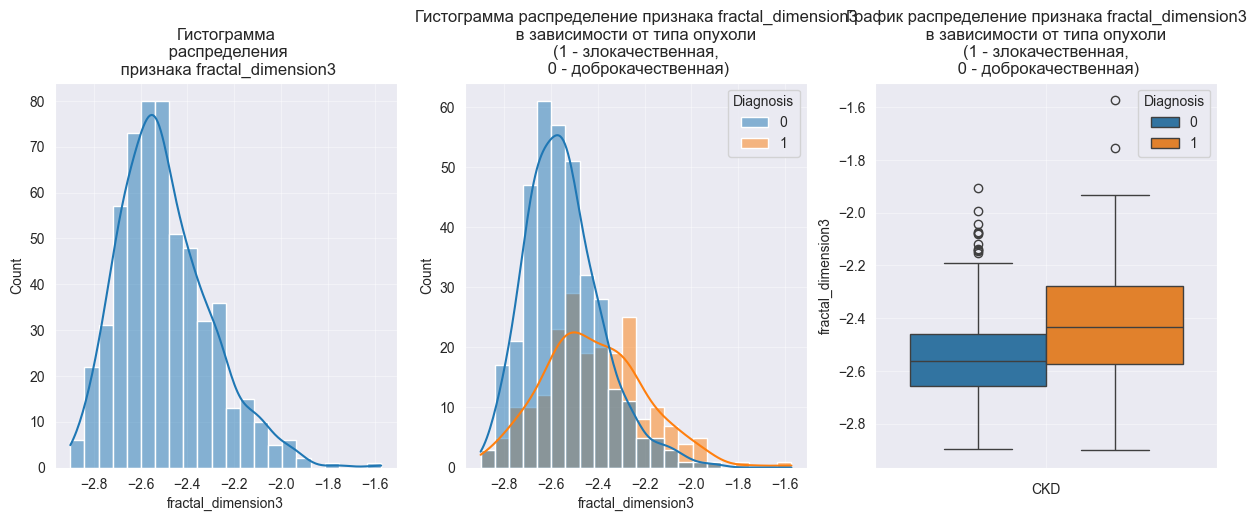

In [645]:
multi_features_assessment(data_processed, TARGET_VAR, features_log_list)

- *После логарифмирования признаков, распределения стали более нормальными, выбросы уменьшились.*

## **Корреляционный анализ**

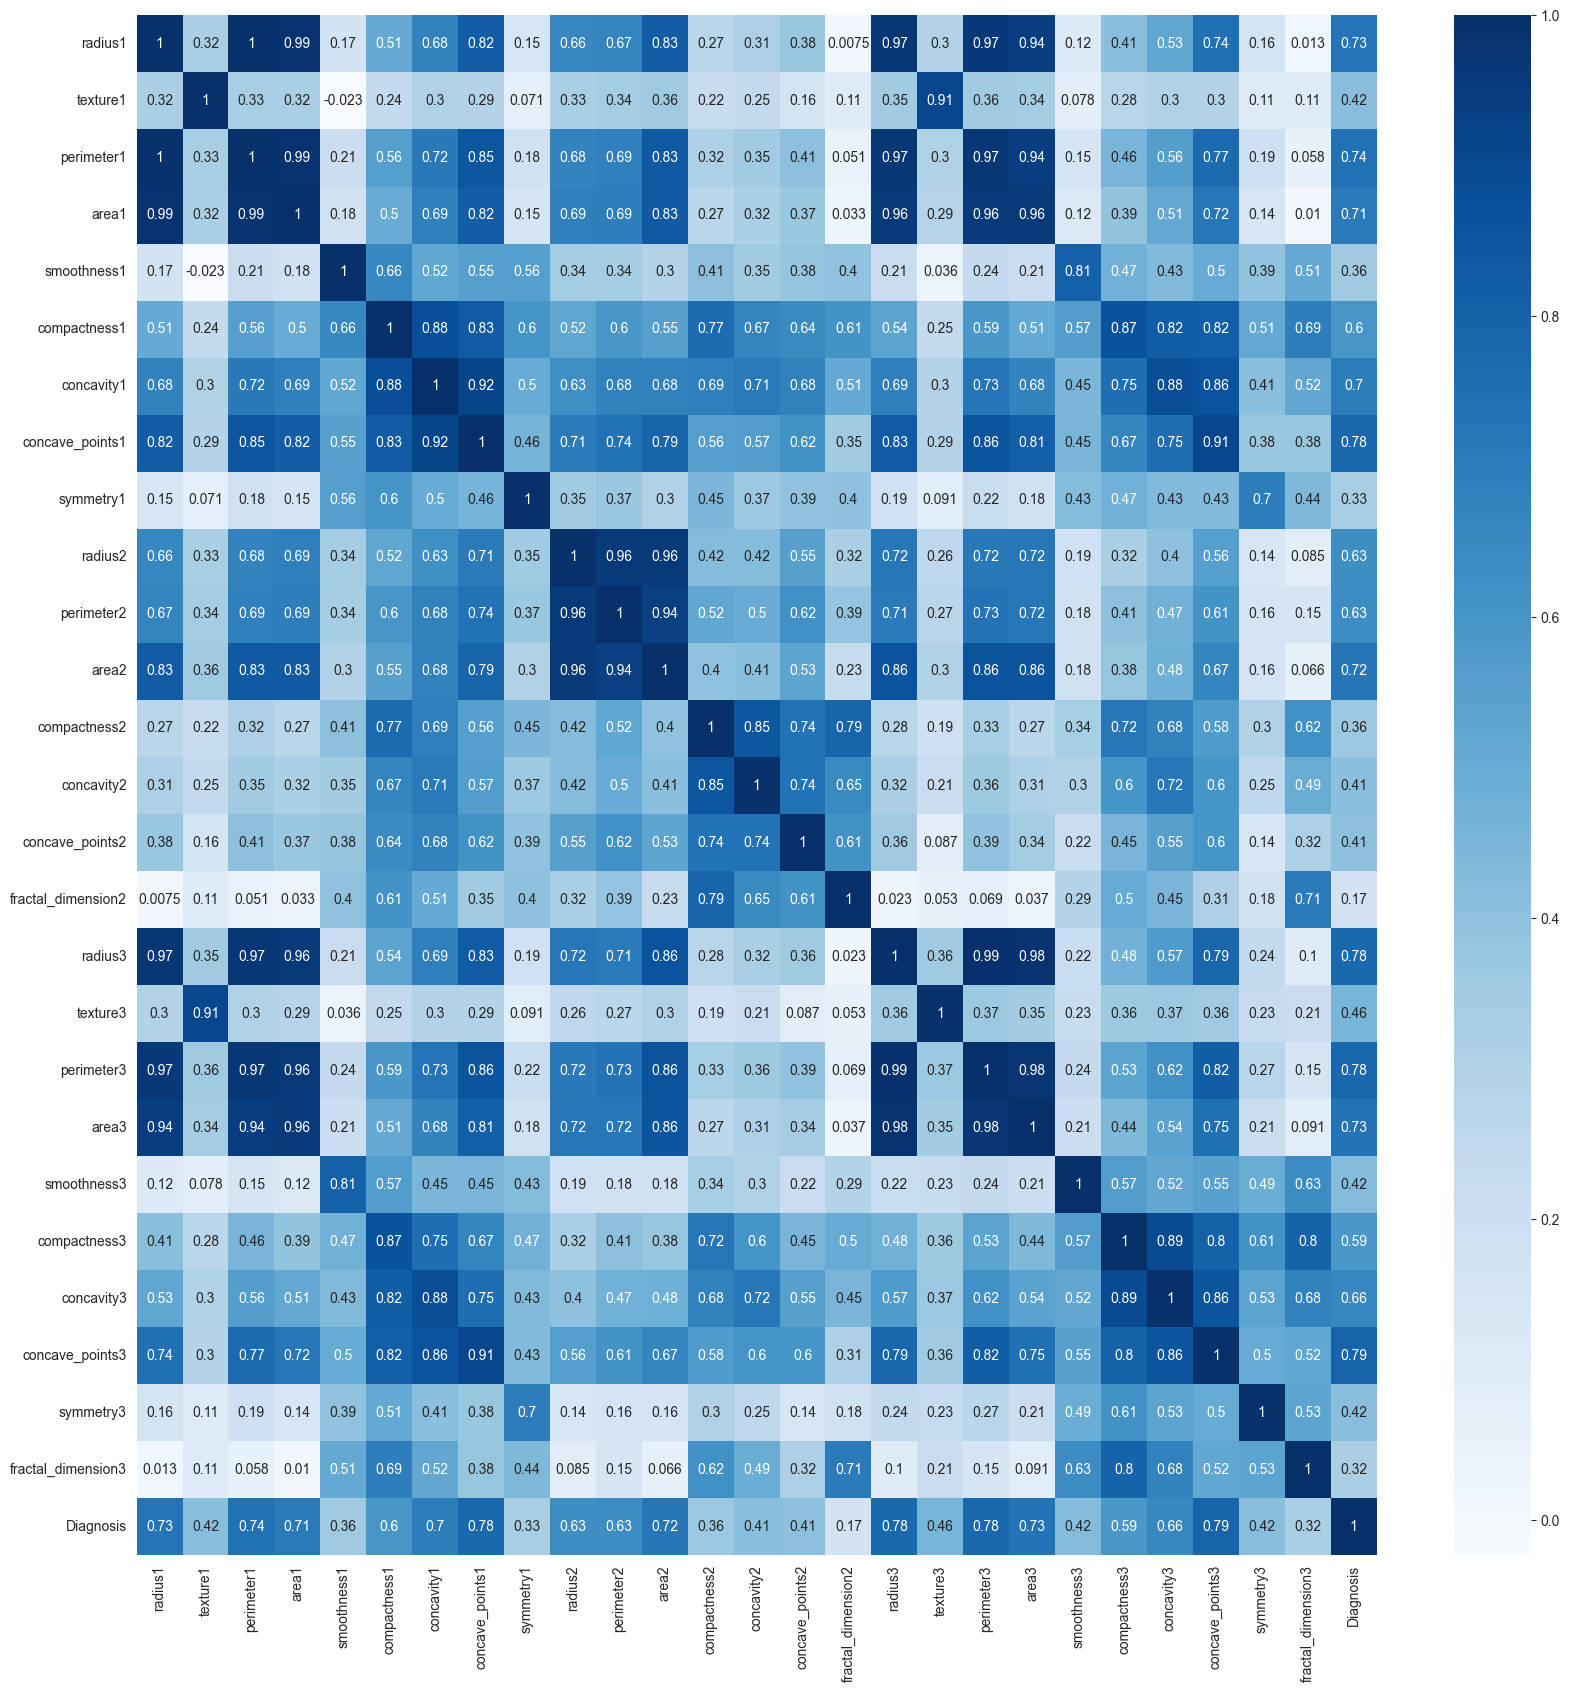

In [646]:
plt.subplots(figsize=(20, 20))
sns.heatmap(data_processed.corr(), cmap="Blues", annot=True);

Отмечается высокая связь целевой переменной со следующими признаками:
- radius1 (0.73)
- perimeter1 (0.74)
- area1 (0.71)
- concave_points1 (0.78)
- radius3 (0.78)
- perimeter3 (0.78)
- area3 (0.73)
- concave_points3 (0.79)

Наблюдается выраженная мультиколлинеарность некоторых признаков. Попробуем вывести матрицу корреляций признаков с сильной мультиколлинеарностью (>0.8)

In [647]:
corr_matrix = data_processed.corr()
high_corr_var = np.where(corr_matrix > 0.8)
high_corr_var = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]
high_corr_var

[('radius1', 'perimeter1'),
 ('radius1', 'area1'),
 ('radius1', 'concave_points1'),
 ('radius1', 'area2'),
 ('radius1', 'radius3'),
 ('radius1', 'perimeter3'),
 ('radius1', 'area3'),
 ('texture1', 'texture3'),
 ('perimeter1', 'area1'),
 ('perimeter1', 'concave_points1'),
 ('perimeter1', 'area2'),
 ('perimeter1', 'radius3'),
 ('perimeter1', 'perimeter3'),
 ('perimeter1', 'area3'),
 ('area1', 'concave_points1'),
 ('area1', 'area2'),
 ('area1', 'radius3'),
 ('area1', 'perimeter3'),
 ('area1', 'area3'),
 ('smoothness1', 'smoothness3'),
 ('compactness1', 'concavity1'),
 ('compactness1', 'concave_points1'),
 ('compactness1', 'compactness3'),
 ('compactness1', 'concavity3'),
 ('compactness1', 'concave_points3'),
 ('concavity1', 'concave_points1'),
 ('concavity1', 'concavity3'),
 ('concavity1', 'concave_points3'),
 ('concave_points1', 'radius3'),
 ('concave_points1', 'perimeter3'),
 ('concave_points1', 'area3'),
 ('concave_points1', 'concave_points3'),
 ('radius2', 'perimeter2'),
 ('radius2', 

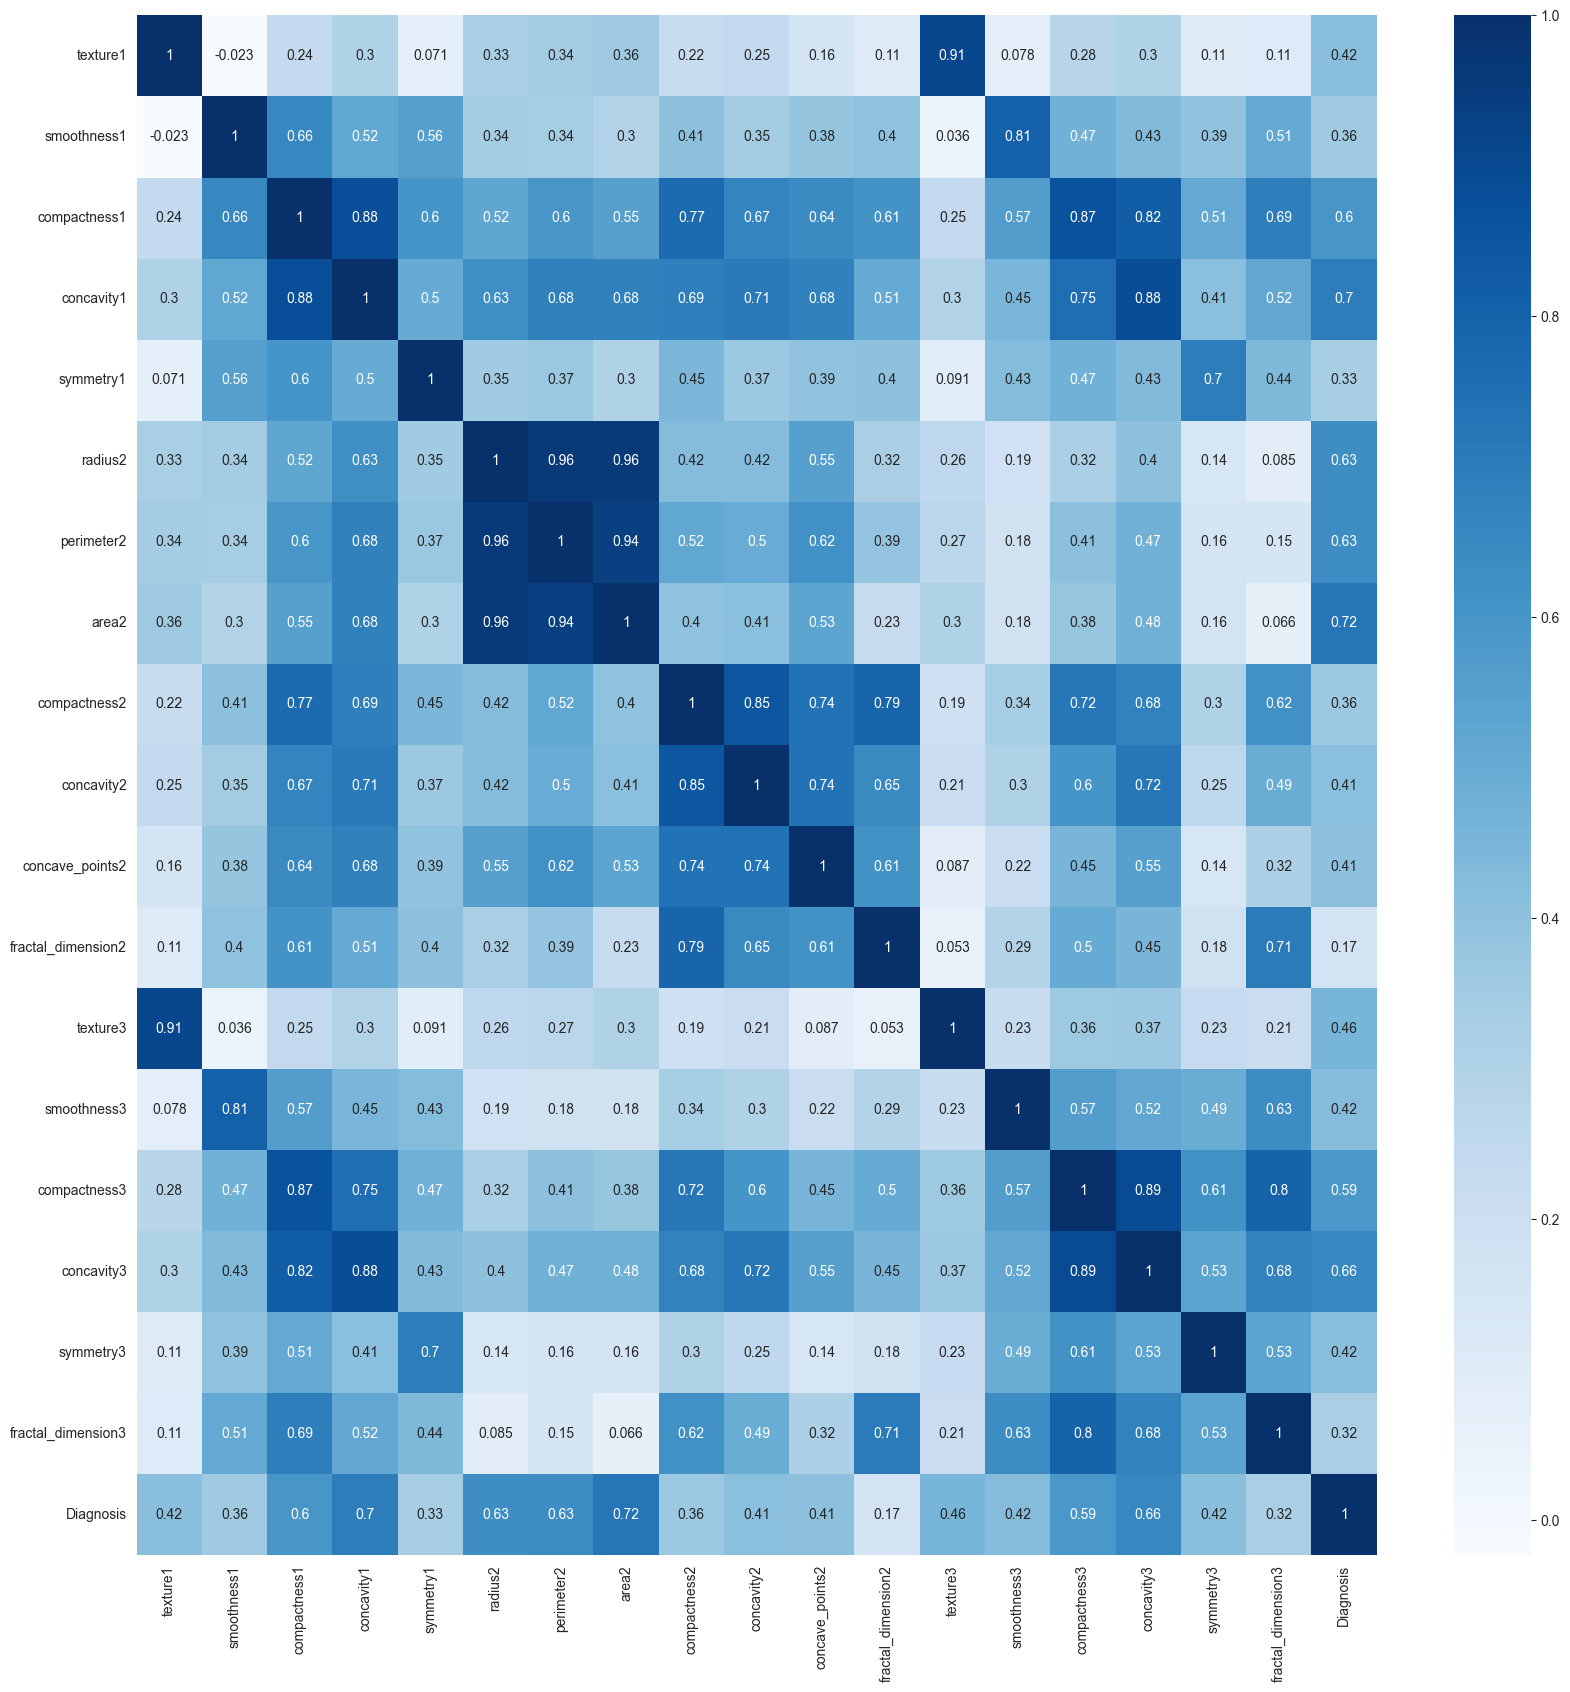

In [648]:
# Сохраним признаки с высокой мультиколлинеарностью с целевой переменной, но уберем мультиколлинеарность между собой
high_corr_list = ['radius1', 'perimeter1', 'area1', 'concave_points1', 'radius3', 'perimeter3', 'area3', 'concave_points3']
data_processed.drop(high_corr_list, axis=1, inplace=True)

plt.subplots(figsize=(20, 20))
sns.heatmap(data_processed.corr(), cmap="Blues", annot=True);

Ранг и определитель матрицы корреляций не изменились после удаления признаков с мультиколлинеарностью.

In [649]:
# Рассчитаем ранг и определитель матрицы корреляций
def rank_det_corr_matrix(data):
    rank_corr_matrix = np.linalg.matrix_rank(data.corr())
    det_corr_matrix = np.linalg.det(data.corr())
    print(f'Ранг матрицы корреляций: {rank_corr_matrix}')
    print(f'Определитель матрицы корреляций: {det_corr_matrix}')

In [650]:
# Рассчитаем ранг и определитель матрицы корреляций
rank_det_corr_matrix(data_processed)

Ранг матрицы корреляций: 19
Определитель матрицы корреляций: 6.482742089766755e-13


In [651]:
# Удалим еще признаки, которые демонстрируют высокую мультиколлинеарность

high_corr_list = ['radius2', 'perimeter2', 'area2', 'concavity2','fractal_dimension2',
                'texture3', 'smoothness1', 'compactness1',
                'compactness3', 'concavity1', 'concavity3', 'symmetry1']
data_processed.drop(high_corr_list, axis=1, inplace=True)
rank_det_corr_matrix(data_processed)

Ранг матрицы корреляций: 7
Определитель матрицы корреляций: 0.05343939561743723


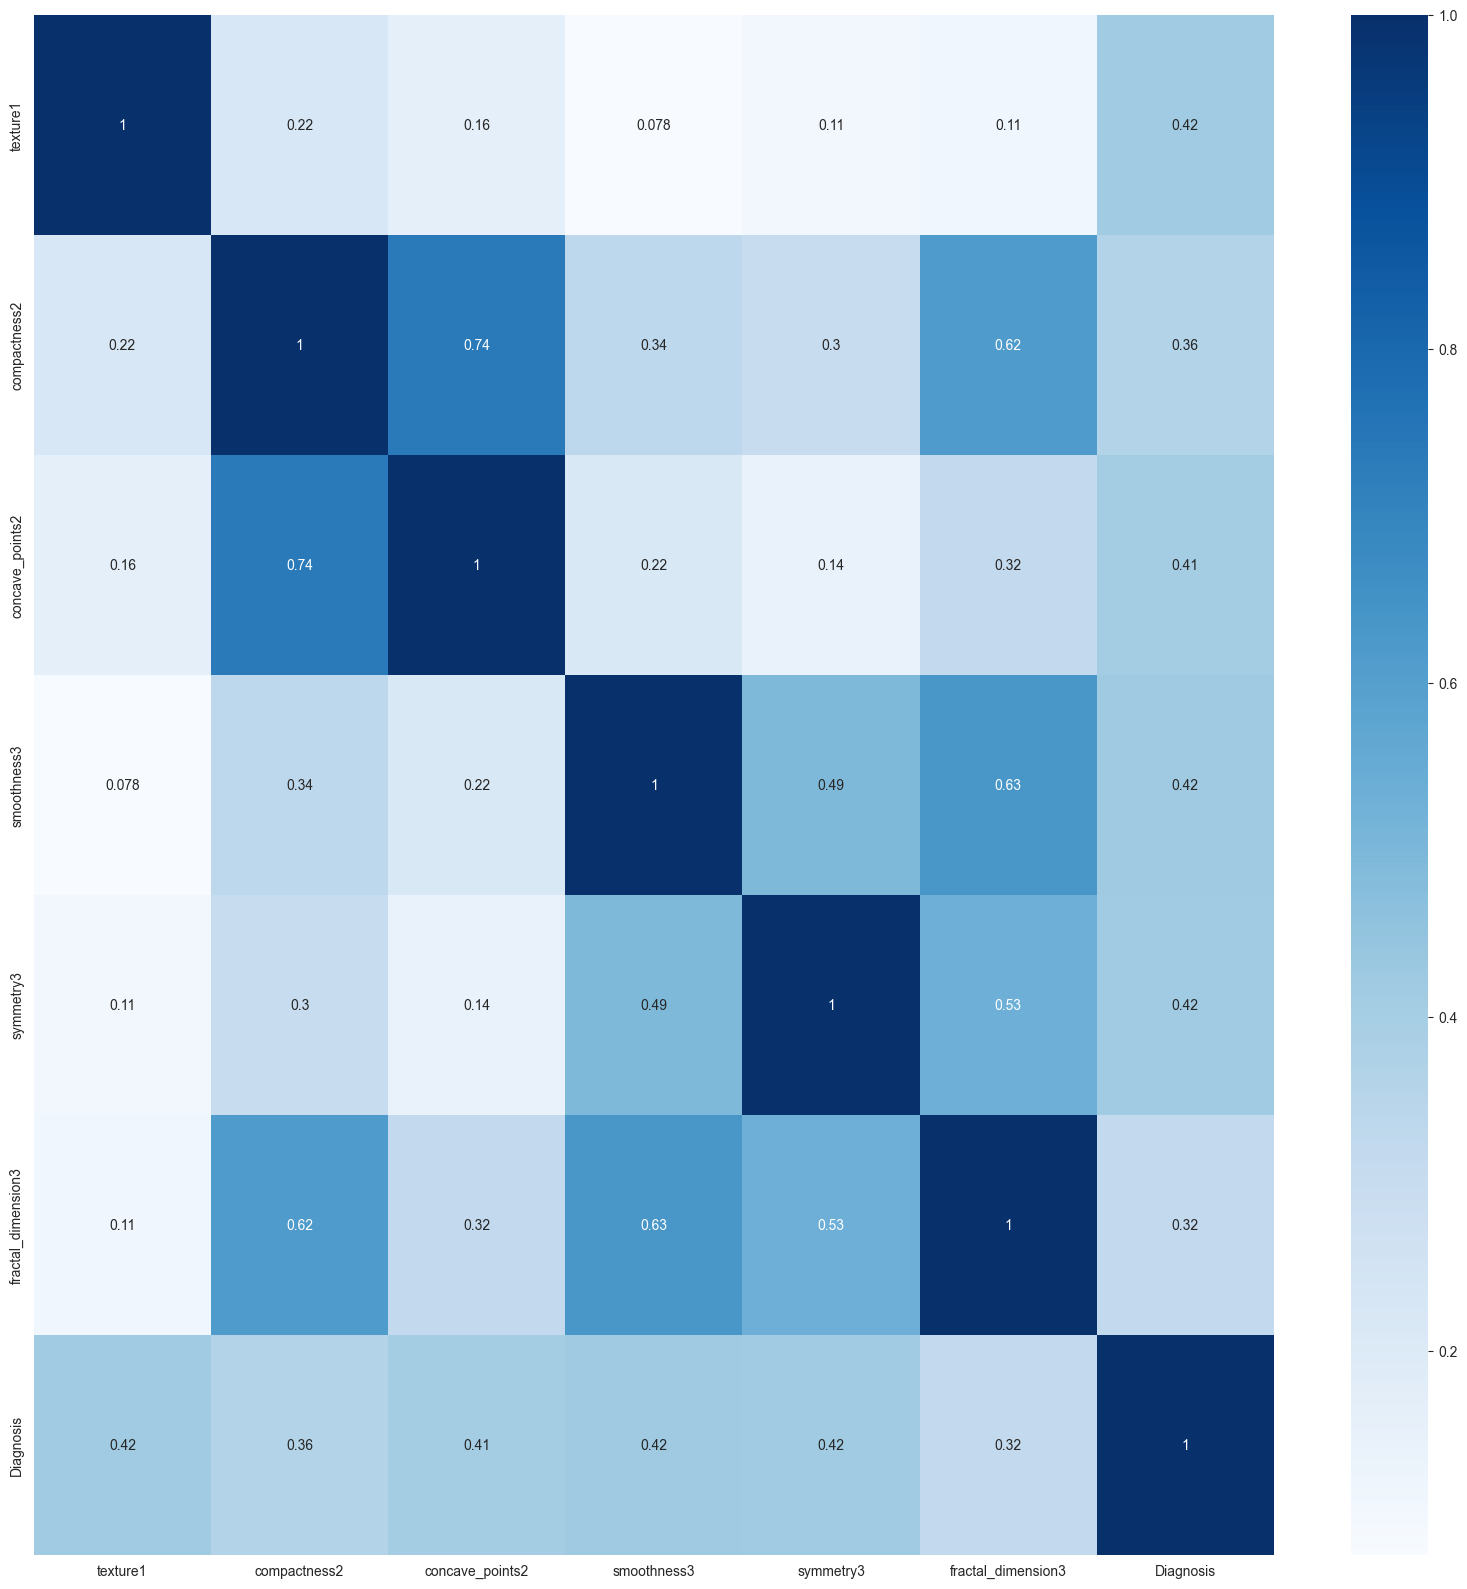

In [652]:
plt.subplots(figsize=(20, 20))
sns.heatmap(data_processed.corr(), cmap="Blues", annot=True);

- *После удаления признаков с мультиколлинеарностью, корреляционная матрица стала более разреженной, что позволит модели лучше обобщать данные.*
- *Ранг матрицы корреляций уменьшился на 2, определитель увеличился.*
- *Оставшиеся признаки имеют слабую корреляцию между собой.*
- *Оставшиеся признаки имеют сильную корреляцию с целевой переменной.*

In [653]:
# Сохраним обработанный датасет
data_processed.to_csv(DATA_PROCEED_PATH + 'dataset1_processed.csv', index=False)

## **Метод главных компонент (PCA)**

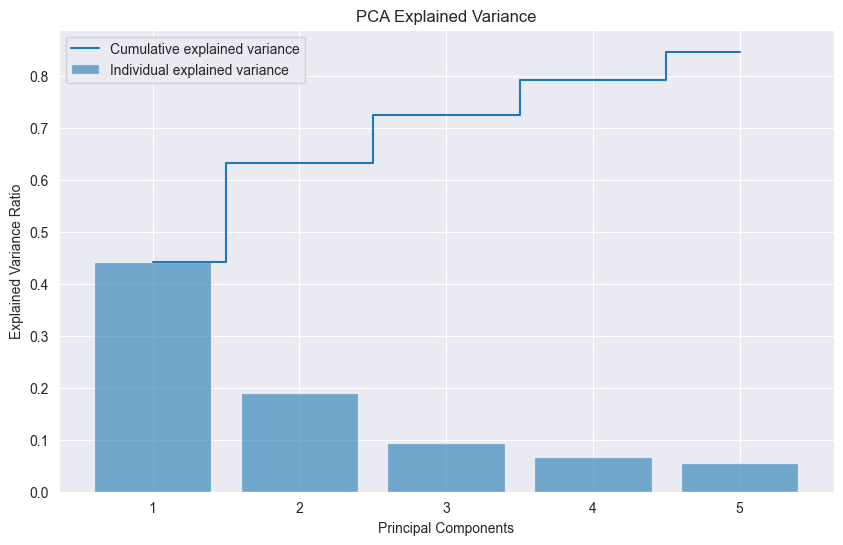

PCA Summary:
  Principal Component  Explained Variance Ratio  Cumulative Variance Ratio  \
0                 PC1                  0.442720                   0.442720   
1                 PC2                  0.189712                   0.632432   
2                 PC3                  0.093932                   0.726364   
3                 PC4                  0.066021                   0.792385   
4                 PC5                  0.054958                   0.847343   

   Eigenvalues  
0    13.304991  
1     5.701375  
2     2.822910  
3     1.984128  
4     1.651633  

Principal Component Loadings:
      radius1  texture1  perimeter1     area1  smoothness1  compactness1  \
PC1  0.218902  0.103725    0.227537  0.220995     0.142590      0.239285   
PC2 -0.233857 -0.059706   -0.215181 -0.231077     0.186113      0.151892   
PC3 -0.008531  0.064550   -0.009314  0.028700    -0.104292     -0.074092   
PC4 -0.041409  0.603050   -0.041983 -0.053434    -0.159383     -0.031795   
PC5 -

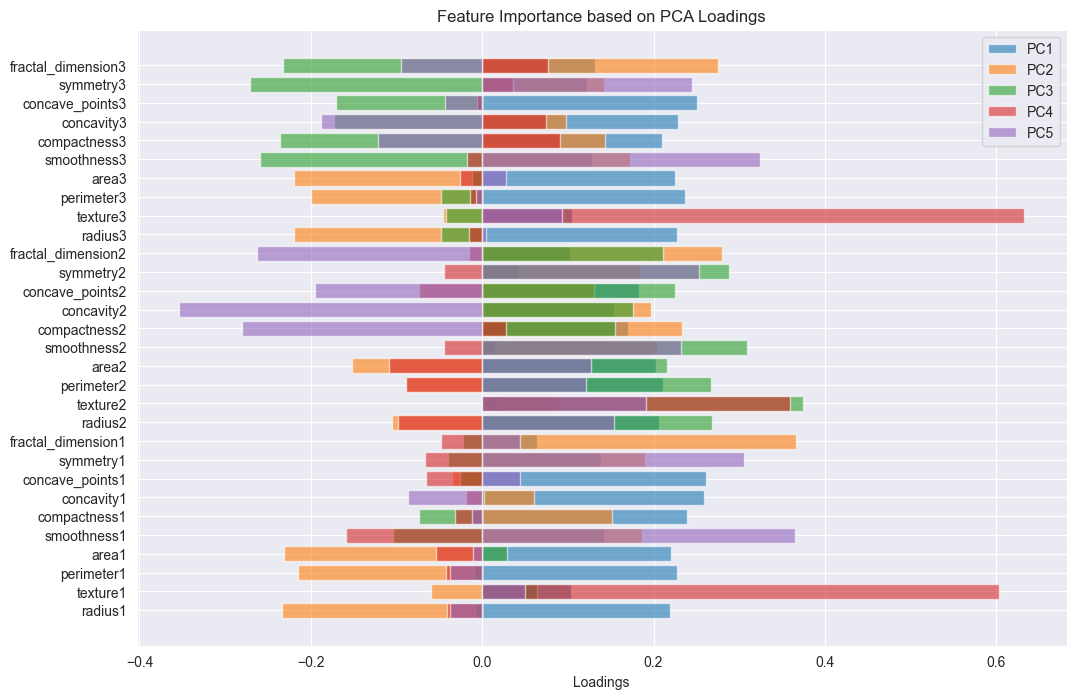


Feature Importance (sorted):
                    Importance
Feature                       
texture2              1.033547
smoothness1           0.957466
texture3              0.917926
smoothness3           0.902142
concavity2            0.882560
texture1              0.880499
fractal_dimension2    0.872766
compactness2          0.865327
radius2               0.832410
symmetry3             0.816910
symmetry2             0.811873
fractal_dimension3    0.811392
concave_points2       0.808012
area2                 0.806948
smoothness2           0.804531
compactness3          0.802897
perimeter2            0.777411
concavity3            0.762259
symmetry1             0.741822
fractal_dimension1    0.546524
area1                 0.544536
radius1               0.540486
perimeter1            0.531391
radius3               0.515194
area3                 0.509410
compactness1          0.508767
perimeter3            0.506322
concave_points3       0.478826
concave_points1       0.430382
concavity

In [654]:
# Определение целевой переменной и признаков
X = data.drop(columns=[TARGET_VAR])
y = data[TARGET_VAR]

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Функция для анализа PCA
def pca_analysis(data, target_column, n_parameters):
    # Разделяем целевую переменную и признаки
    X = data.drop(columns=[target_column])
    y = data[target_column]

    # Применяем PCA
    pca = PCA(n_components=n_parameters)
    pca.fit(X_scaled)

    # Получаем значимость компонентов
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)
    # Получаем собственные значения и векторы
    eigenvalues = pca.explained_variance_
    components = pca.components_

    # Создаем график объясненной дисперсии
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, n_parameters + 1), explained_variance, alpha=0.6, align='center', label='Individual explained variance')
    plt.step(range(1, n_parameters + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('PCA Explained Variance')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # Возвращаем DataFrame с результатами
    pca_summary = pd.DataFrame({
        'Principal Component': [f'PC{i + 1}' for i in range(n_parameters)],
        'Explained Variance Ratio': explained_variance,
        'Cumulative Variance Ratio': cumulative_variance,
        'Eigenvalues': eigenvalues
    })

    # Выводим компоненты
    components_df = pd.DataFrame(components, columns=X.columns, index=[f'PC{i + 1}' for i in range(n_parameters)])

    return pca_summary, components_df

# Функция для визуализации важности признаков
def plot_feature_importance(components_df):
    plt.figure(figsize=(12, 8))
    for i in range(components_df.shape[0]):
        plt.barh(components_df.columns, components_df.iloc[i], alpha=0.6, label=f'PC{i + 1}')
    plt.xlabel('Loadings')
    plt.title('Feature Importance based on PCA Loadings')
    plt.legend()
    plt.grid(True)
    plt.show()

# Функция для вывода признаков по важности
def feature_importance(components_df):
    # Вычисляем абсолютные значения нагрузок
    importance = np.abs(components_df).sum(axis=0)

    # Создаем DataFrame для важности признаков
    importance_df = pd.DataFrame(importance, columns=['Importance'])
    importance_df.index.name = 'Feature'

    # Сортируем по важности в убывающем порядке
    sorted_importance_df = importance_df.sort_values(by='Importance', ascending=False)

    return sorted_importance_df

n_parameters = 5
pca_summary, components_df = pca_analysis(data, TARGET_VAR, n_parameters)

#  результаты
print("PCA Summary:")
print(pca_summary)
print("\nPrincipal Component Loadings:")
print(components_df)

# Визуализируем важность признаков
plot_feature_importance(components_df)

# Выводим список признаков в убывающем порядке по важности
sorted_importance_df = feature_importance(components_df)
print("\nFeature Importance (sorted):")
print(sorted_importance_df)


In [655]:
# Получаем 10 наиболее важных признаков
top_n_features = sorted_importance_df.head(10).index.tolist()

# Выводим список признаков
print(f"Top {len(top_n_features)} Features:")
print(top_n_features)

Top 10 Features:
['texture2', 'smoothness1', 'texture3', 'smoothness3', 'concavity2', 'texture1', 'fractal_dimension2', 'compactness2', 'radius2', 'symmetry3']


In [656]:
# Сохраняем данные с наиболее важными признаками
data_top = data[top_n_features + [TARGET_VAR]]
data_top.to_csv(DATA_PROCEED_PATH + 'dataset2_top_features.csv', index=False)

## **Метод главных компонент (PCA)** с логарифмированием данных

In [657]:
# Разделение данных на X и y
X = data.drop(columns=[TARGET_VAR])
X = np.log(X + 1) # Логарифмируем данные

y = data[TARGET_VAR]

In [658]:
import plotly.express as px

pca = PCA()
pca.fit(X)

variance_cum = np.cumsum(pca.explained_variance_ratio_)
fig = px.line(x=np.arange(1,variance_cum.shape[0]+1),
              y=variance_cum, markers=True,
              labels={'x':'# of components',
                      'y':'Cumulative Explained Variance'}
              )
fig.show()

- *На графике видно, что первые 5 компонентов объясняют около 95% дисперсии данных.*
- *Поэтому в дальнейшем можем использовать всего 6 главных компонентов.*

In [659]:
# Выбираем 6 главных компонентов
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(X_pca, columns=[f'PC{i + 1}' for i in range(6)])

# Выводим размеры новых данных
print(f"Original shape: {X.shape}")
print(f"Transformed shape: {X_pca.shape}")

# Сохраняем данные
data_pca = pd.concat([X_pca, y], axis=1)
data_pca.to_csv(DATA_PROCEED_PATH + 'dataset3_pca.csv', index=False)

Original shape: (569, 30)
Transformed shape: (569, 6)
